In [5]:
import os
import sys
import scipy
import cv2 
import numpy as np
# import moviepy.editor as mpy
# from moviepy.video.io.bindings import mplfig_to_npimage

from scipy import stats
from matplotlib import pyplot as plt, rcParams, rc
from sklearn import decomposition
import pandas as pd
%matplotlib inline
%precision 4
%config InlineBackend.figure_format = 'retina'

rc('animation', html='html5')
rcParams['figure.figsize'] = 8, 10
np.set_printoptions(precision=4, linewidth=100)

## Load the video

In [6]:
# video = mpy.VideoFileClip('data/Video_003.avi') # you need to download the video file to this location
# video.subclip(0, 50).ipython_display(width=500)

In [7]:
# !rm __temp__.mp4

In [47]:
#video.duration, video.size

In [6]:
import glob

In [7]:
carvana_path = '/opt/datasets/kaggle/Carvana/'
trn_fld =  sorted(glob.glob(carvana_path + 'train/*'))
len(trn_fld)

5088

In [8]:
test_fld =  sorted(glob.glob(carvana_path + 'test/*'))
len(test_fld)

100064

In [9]:
usv_fld =  sorted(glob.glob(carvana_path + 'backgdusv2/*'))
len(usv_fld)

105152

In [10]:
total = trn_fld
totalpd = pd.DataFrame()
totalpd['path'] = total
totalpd['pictures'] = totalpd['path'].apply(lambda x: x.split('/')[-1].split('.')[0])
totalpd.sort_values(by='pictures').reset_index(drop=True).head()

path         pictures
0  /opt/datasets/kaggle/Carvana/train/00087a6bd4d...  00087a6bd4dc_01
1  /opt/datasets/kaggle/Carvana/train/00087a6bd4d...  00087a6bd4dc_02
2  /opt/datasets/kaggle/Carvana/train/00087a6bd4d...  00087a6bd4dc_03
3  /opt/datasets/kaggle/Carvana/train/00087a6bd4d...  00087a6bd4dc_04
4  /opt/datasets/kaggle/Carvana/train/00087a6bd4d...  00087a6bd4dc_05

In [77]:
totalpd['img_mean_top'] = totalpd['path'].apply(lambda x: cv2.imread(x)[:40,:,:].mean())
 

In [78]:
totalpd['pict_source'] = totalpd['pictures'].apply(lambda x: x.split('_')[0])

In [10]:
totalpd['uniq_pictures']=totalpd['path'].apply(lambda x: x.split('/')[-1].split('_')[0])

In [109]:
totalpd[totalpd.img_mean_top==totalpd.img_mean_top.min()]

path         pictures  \
1619  /opt/datasets/kaggle/Carvana/train/4a4364d7fc6...  4a4364d7fc6d_04   

      img_mean_top   pict_source  img_mean_gby  
1619    206.505687  4a4364d7fc6d           NaN

In [110]:
totalpd[totalpd.pict_source=='4a4364d7fc6d']

path         pictures  \
1616  /opt/datasets/kaggle/Carvana/train/4a4364d7fc6...  4a4364d7fc6d_01   
1617  /opt/datasets/kaggle/Carvana/train/4a4364d7fc6...  4a4364d7fc6d_02   
1618  /opt/datasets/kaggle/Carvana/train/4a4364d7fc6...  4a4364d7fc6d_03   
1619  /opt/datasets/kaggle/Carvana/train/4a4364d7fc6...  4a4364d7fc6d_04   
1620  /opt/datasets/kaggle/Carvana/train/4a4364d7fc6...  4a4364d7fc6d_05   
1621  /opt/datasets/kaggle/Carvana/train/4a4364d7fc6...  4a4364d7fc6d_06   
1622  /opt/datasets/kaggle/Carvana/train/4a4364d7fc6...  4a4364d7fc6d_07   
1623  /opt/datasets/kaggle/Carvana/train/4a4364d7fc6...  4a4364d7fc6d_08   
1624  /opt/datasets/kaggle/Carvana/train/4a4364d7fc6...  4a4364d7fc6d_09   
1625  /opt/datasets/kaggle/Carvana/train/4a4364d7fc6...  4a4364d7fc6d_10   
1626  /opt/datasets/kaggle/Carvana/train/4a4364d7fc6...  4a4364d7fc6d_11   
1627  /opt/datasets/kaggle/Carvana/train/4a4364d7fc6...  4a4364d7fc6d_12   
1628  /opt/datasets/kaggle/Carvana/train/4a4364d7fc6...  4a4364d7fc6d_13   
1629  /opt/datasets/kaggle/Carvana/train/4a4364d7fc6...  4a4364d7fc6d_14   
1630  /opt/datasets/kaggle/Carvana/train/4a4364d7fc6...  4a4364d7fc6d_15   
1631  /opt/datasets/kaggle/Carvana/train/4a4364d7fc6...  4a4364d7fc6d_16   

      img_mean_top   pict_source  img_mean_gby  
1616    207.964955  4a4364d7fc6d           NaN  
1617    207.632099  4a4364d7fc6d           NaN  
1618    207.237035  4a4364d7fc6d           NaN  
1619    206.505687  4a4364d7fc6d           NaN  
1620    207.711670  4a4364d7fc6d           NaN  
1621    207.614442  4a4364d7fc6d           NaN  
1622    207.574748  4a4364d7fc6d           NaN  
1623    208.098471  4a4364d7fc6d           NaN  
1624    207.293843  4a4364d7fc6d           NaN  
1625    207.897723  4a4364d7fc6d           NaN  
1626    207.906565  4a4364d7fc6d           NaN  
1627    207.760862  4a4364d7fc6d           NaN  
1628    208.465459  4a4364d7fc6d           NaN  
1629    208.053167  4a4364d7fc6d           NaN  
1630    208.477068  4a4364d7fc6d           NaN  
1631    208.265103  4a4364d7fc6d           NaN

In [85]:
totalpd2 = totalpd.groupby('pict_source')['img_mean_top'].mean()

In [95]:
totalpd3 = totalpd2.apply(lambda x: int(x))

In [96]:
uniq_img = list(totalpd3.unique())
len(uniq_img)

42

In [120]:
from math import sqrt

def stat(lst):
    """Calculate mean and std deviation from the input list."""
    n = float(len(lst))
    mean = sum(lst) / n
    stdev = sqrt((sum(x*x for x in lst) / n) - (mean * mean)) 
    return mean, stdev

def parse(lst, n):
    cluster = []
    for i in lst:
        if len(cluster) <= 1:    # the first two values are going directly in
            cluster.append(i)
            continue

        mean,stdev = stat(cluster)
        if abs(mean - i) > n * stdev:    # check the "distance"
            yield cluster
            cluster[:] = []    # reset cluster to the empty list

        cluster.append(i)
    yield cluster           # yield the last cluster

In [123]:
array = sorted(uniq_img)

In [128]:
for cluster in parse(array, 2):
    print(cluster)


[207, 208]
[209, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 224, 225]
[227, 228]
[229, 230]
[231, 232]
[233, 234]
[235, 236]
[237, 238]
[239, 240]
[241, 242]
[243, 244]
[245, 246]
[247, 248]
[249, 250]
[251, 252]
[253]


ValueError: incompatible sizes: argument 'height' must be length 1 or scalar

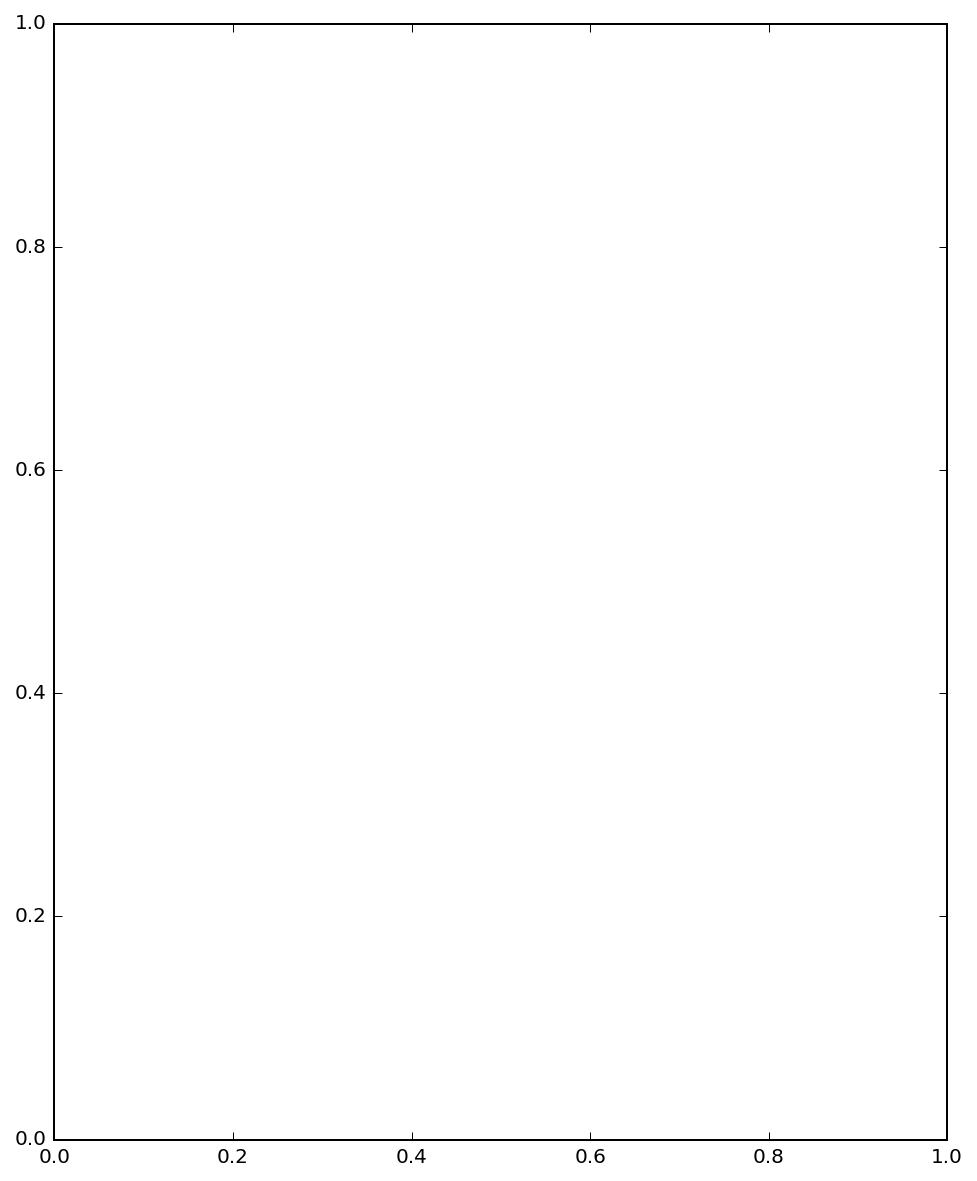

In [107]:
y = uniq_img
N = len(y)
x = range
width = 1/1.5
plt.bar(x, y, width, color="blue")

In [13]:
# totalpd['top'] = totalpd['path'].apply(lambda x: cv2.imread(x)[:50,:,:].mean())

In [14]:
# totalpd['topint']=totalpd['top'].apply(lambda x: int(round(x)))

In [15]:
totalpd.head()

path         pictures  \
0  /opt/datasets/kaggle/Carvana/train/00087a6bd4d...  00087a6bd4dc_01   
1  /opt/datasets/kaggle/Carvana/train/00087a6bd4d...  00087a6bd4dc_02   
2  /opt/datasets/kaggle/Carvana/train/00087a6bd4d...  00087a6bd4dc_03   
3  /opt/datasets/kaggle/Carvana/train/00087a6bd4d...  00087a6bd4dc_04   
4  /opt/datasets/kaggle/Carvana/train/00087a6bd4d...  00087a6bd4dc_05   

  uniq_pictures  
0  00087a6bd4dc  
1  00087a6bd4dc  
2  00087a6bd4dc  
3  00087a6bd4dc  
4  00087a6bd4dc

In [16]:
totalpd['uniq_pictures'].unique()

array(['00087a6bd4dc', '02159e548029', '03a857ce842d', ..., 'ffe45737b4af', 'fff013bbf988',
       'fff341f26a19'], dtype=object)

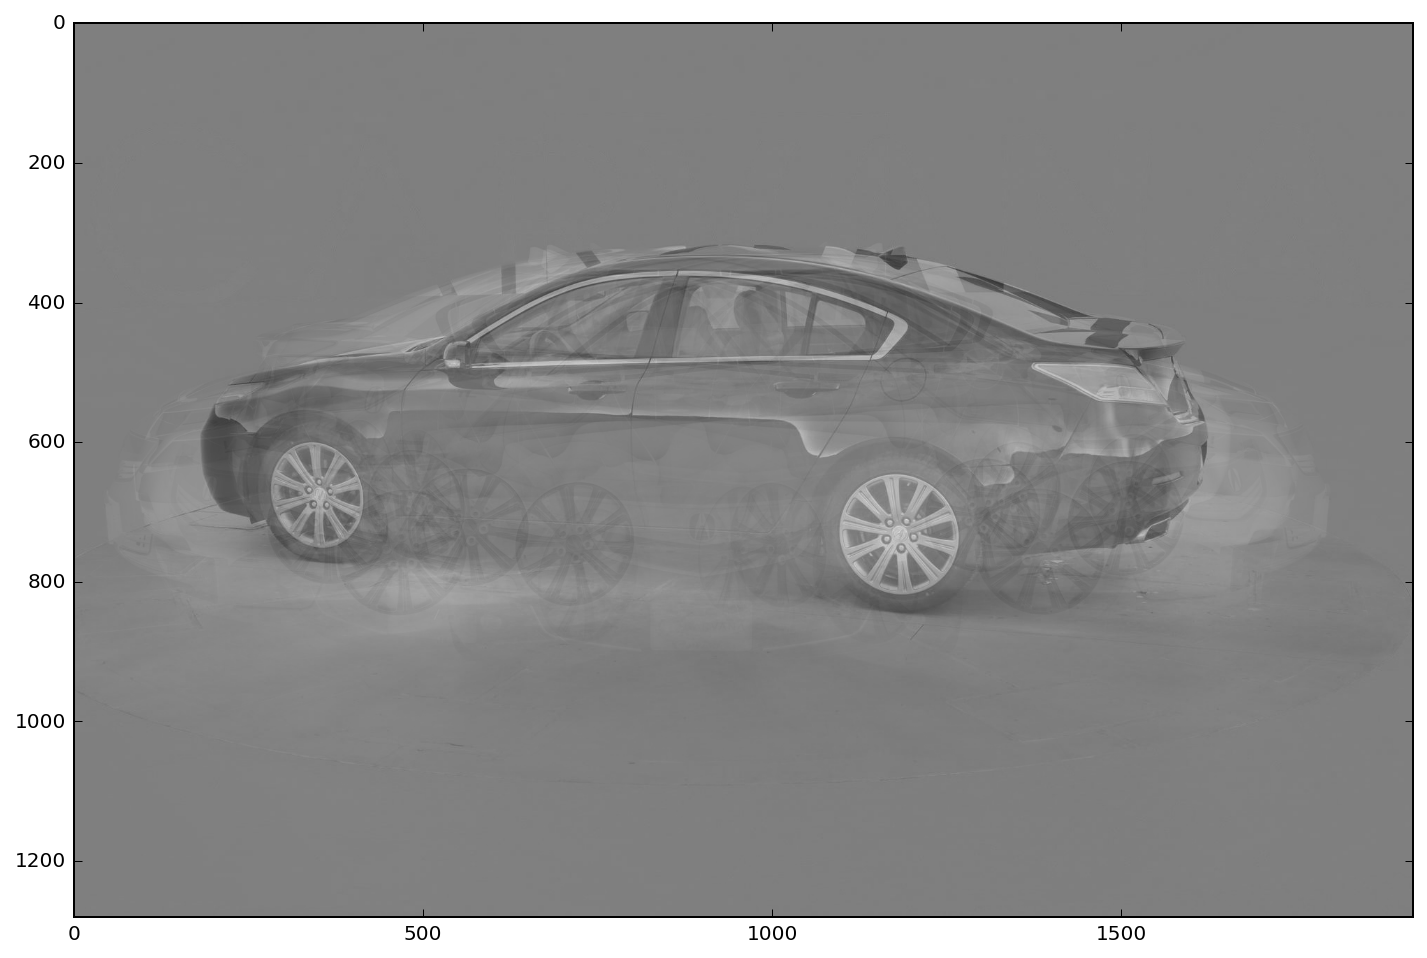

In [17]:
toto = cv2.imread(usv_fld[5])
toto.shape

plt.figure(figsize=(12,12))
plt.imshow(toto, cmap='gray')

In [18]:
toto[:,:,0].max()

233

## Helper functions

In [19]:
# def create_data_matrix_from_video(clip, k, scale):
#     frames = []
#     for i in range(k * int(clip.duration)):
#         frame = clip.get_frame(i / float(k))
#         frame = rgb2grey(frame).astype(int)
#         frame = scipy.misc.imresize(frame, scale).flatten()
#         frames.append(frame)
#     return np.vstack(frames).T # stack images horizontally

def create_data_matrix_from_video(clip, scale):
    frames = []
    for i in clip:
        frame = cv2.imread(i)
        frame = rgb2grey(frame).astype(int)
        frame = scipy.misc.imresize(frame, scale).flatten()
        frames.append(frame)
    return np.vstack(frames).T # stack images horizontally


def rgb2grey(rgb):
    return np.dot(rgb[..., :3], [1,1,1]) #[0.299, 0.587, 0.114])

def plot_images(M, A, E, index_array, dims, filename=None):
    f = plt.figure(figsize=(15, 10))
    r = len(index_array)
    pics = r * 3
    for k, i in enumerate(index_array):
        for j, mat in enumerate([M, A, E]):
            sp = f.add_subplot(r, 3, 3*k + j + 1)
            sp.axis('Off')
            if isinstance(pixels, scipy.sparse.csr_matrix):
                pixels = pixels.todense()
            plt.imshow(np.reshape(pixels, dims), cmap='gray')
    return f

## Video matrix

In [20]:
# change resolution of image
scale = 100 # scale to X percent (100 means no scaling). CHANGE THIS FOR BETTER RESOLUTION
original_width = toto.shape[0]
original_height = toto.shape[1]

dims = (int(original_width * scale / 100), int(original_height * scale / 100))
dims # single frame dimensions (height x width)

(1280, 1918)

In [21]:
fps = 25
M = create_data_matrix_from_video(trn_fld[:14], scale)
np.save('video_matrix', M)
M.shape, dims

((2455040, 14), (1280, 1918))

## Simple foreground and background separation

Show some frame from the video matrix

In [154]:
M[:,10].max()

255

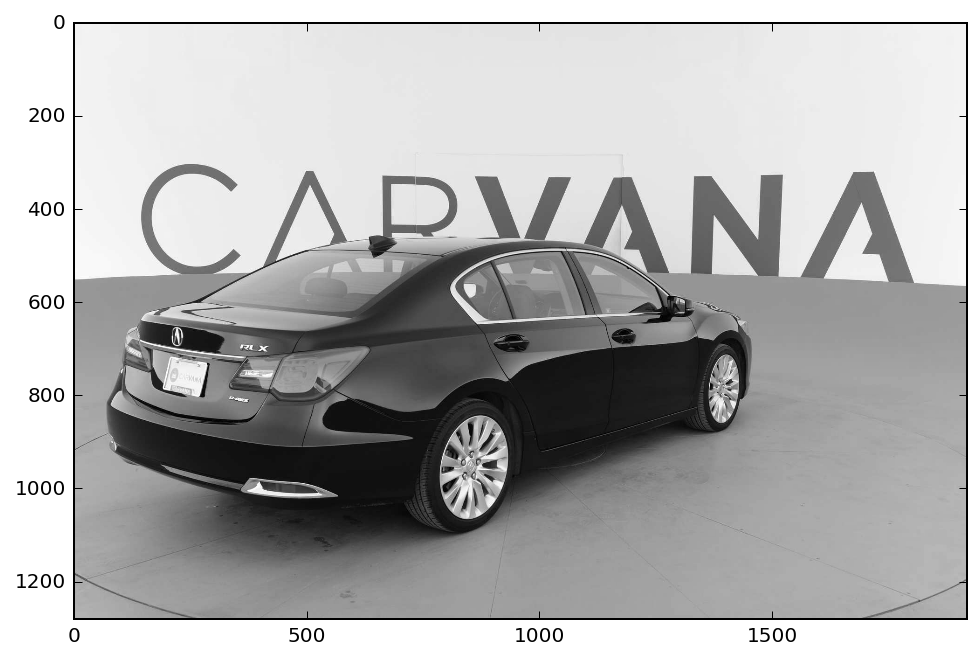

In [155]:
test_image = M[:,10].reshape(dims)
plt.imshow(test_image, cmap='gray');

Show the entire video matrix

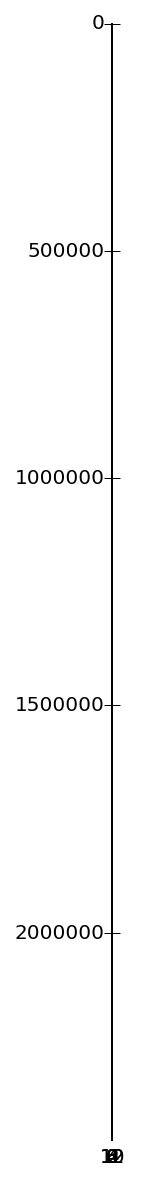

In [48]:
# this might take a while ...
plt.imshow(M, cmap='gray');

Get the background by sampling some columns and taking the mode

In [49]:
# this takes a while...
random_columns = np.random.randint(0, M.shape[1], 1000)
background = stats.mode(M[:, random_columns], axis=1).mode
np.save('background', background)
background.shape

KeyboardInterrupt: 

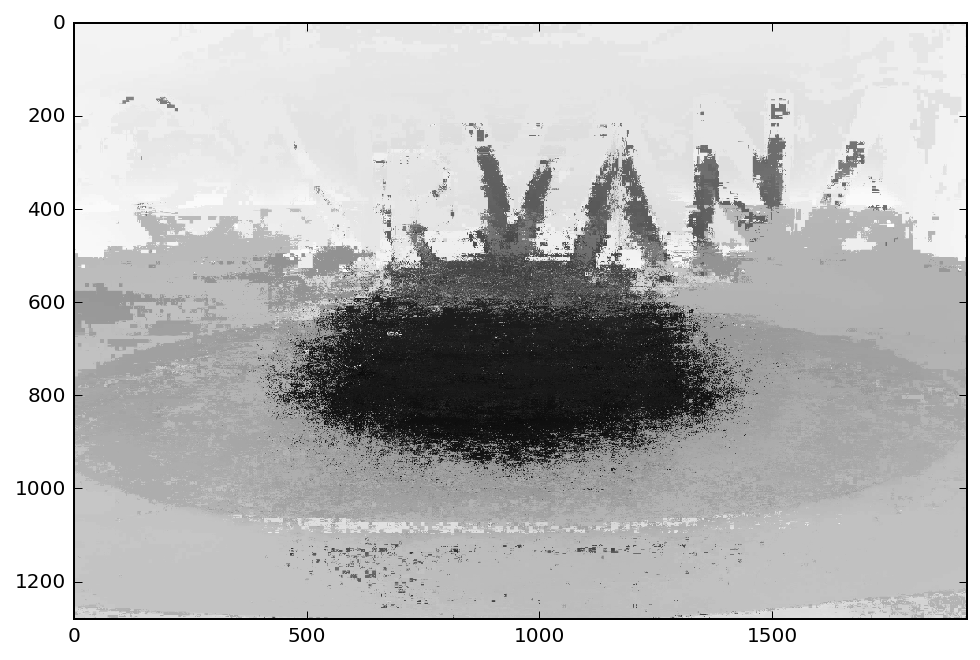

In [24]:
plt.imshow(background.reshape(dims), cmap='gray');

Extract only the people

In [25]:
people = M - background
people.shape

(2455040, 400)

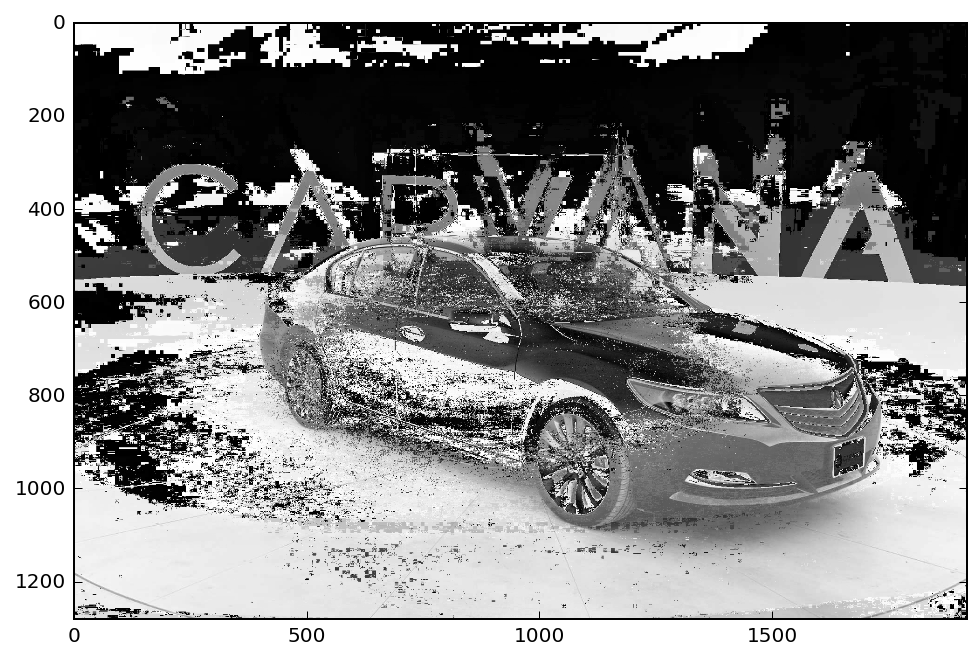

In [26]:
plt.imshow(people[:,14].reshape(dims), cmap='gray');

Clean up the noise

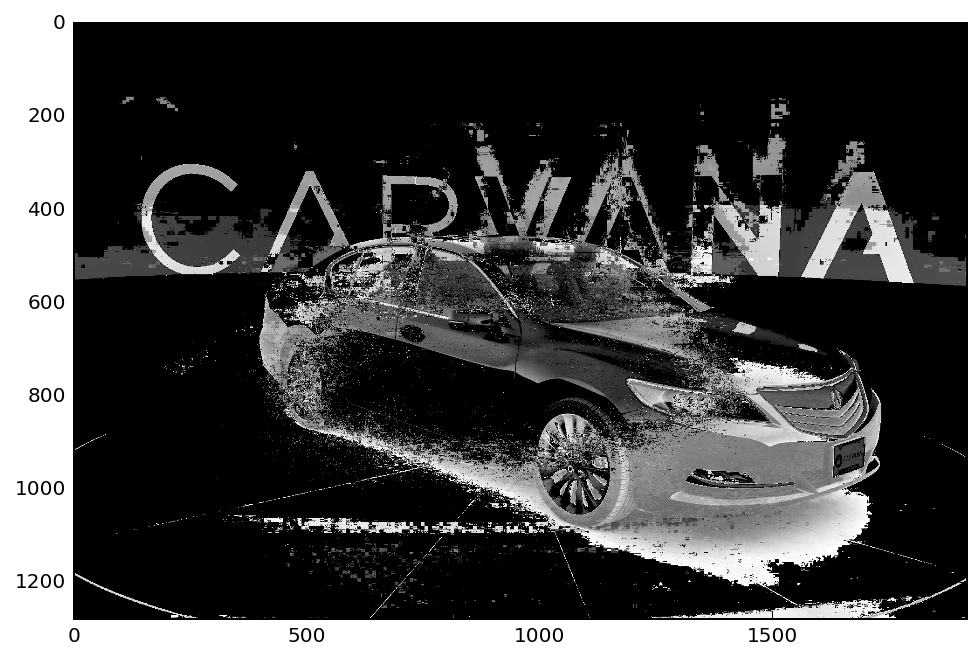

In [27]:
people[(people < 25) | (people > 210)] = 0
plt.imshow(people[:,14].reshape(dims), cmap='gray');

It's a bit noisy so... Let's keep the background but use SVD for the foregound.

Apply SVD

In [35]:
# this takes a while...
U, s, Vh = decomposition.randomized_svd(M, 1)
print(U.shape, s.shape, Vh.shape)
np.savez('svd_components', U, s, Vh)

((2455040, 1), (1,), (1, 14))


Create a low rank approximation of the video matrix

In [36]:
# this takes a while...
low_rank_M = U.dot(np.diag(s).dot(Vh))
np.save('low_rank_video_matrix', low_rank_M)
low_rank_M.shape

(2455040, 14)

Extract only the people

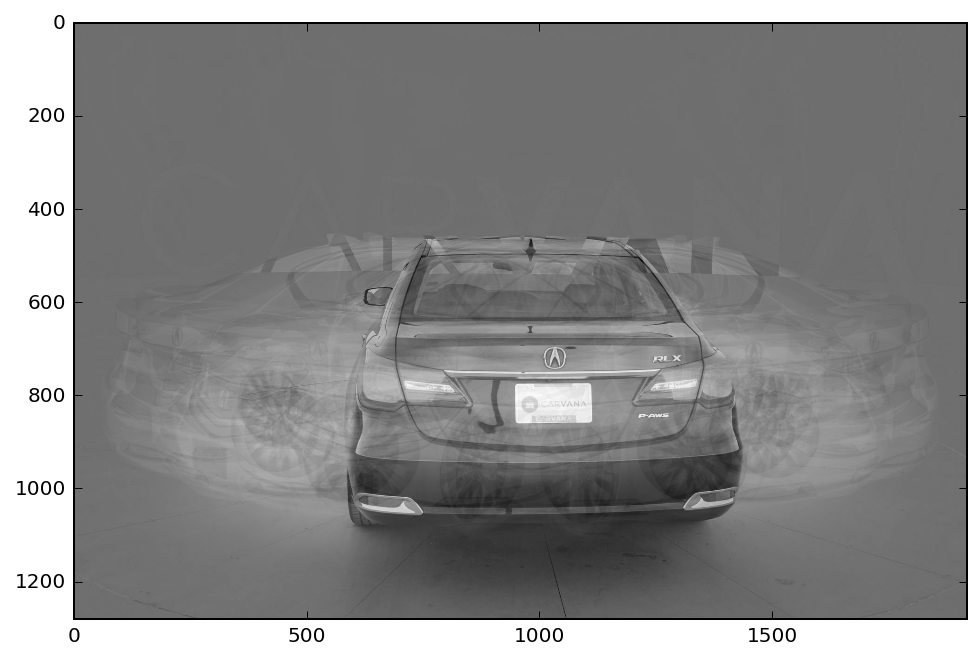

In [37]:
people = M - low_rank_M
plt.imshow(people[:,8].reshape(dims), cmap='gray');

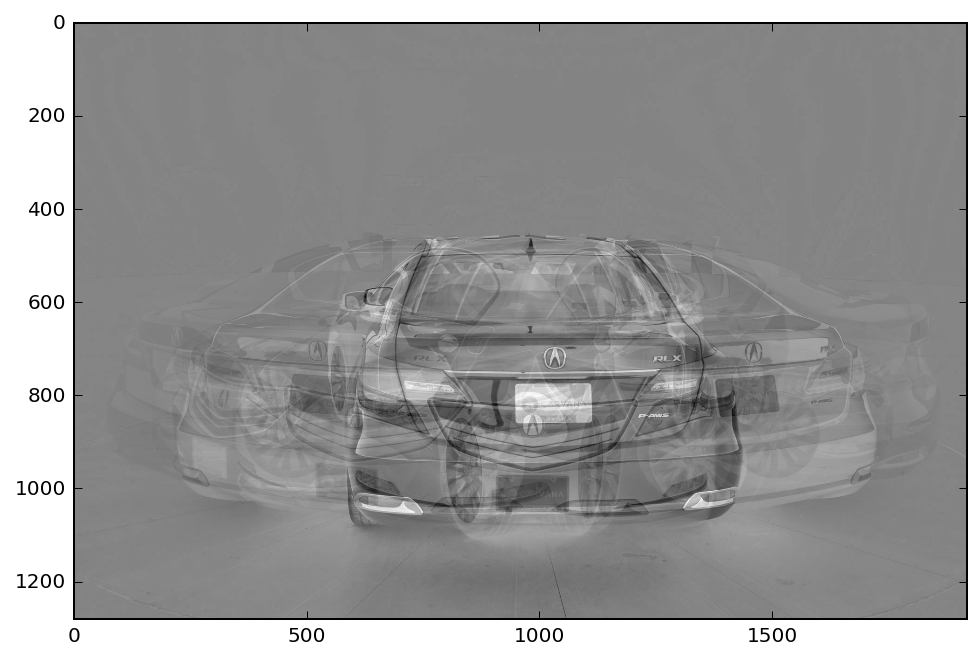

In [34]:
people = M - low_rank_M
plt.imshow(people[:,8].reshape(dims), cmap='gray');

In [159]:
toto = (people[:,1]+255.)/2.
toto.min(), toto.max()

(38.0590, 219.3046)

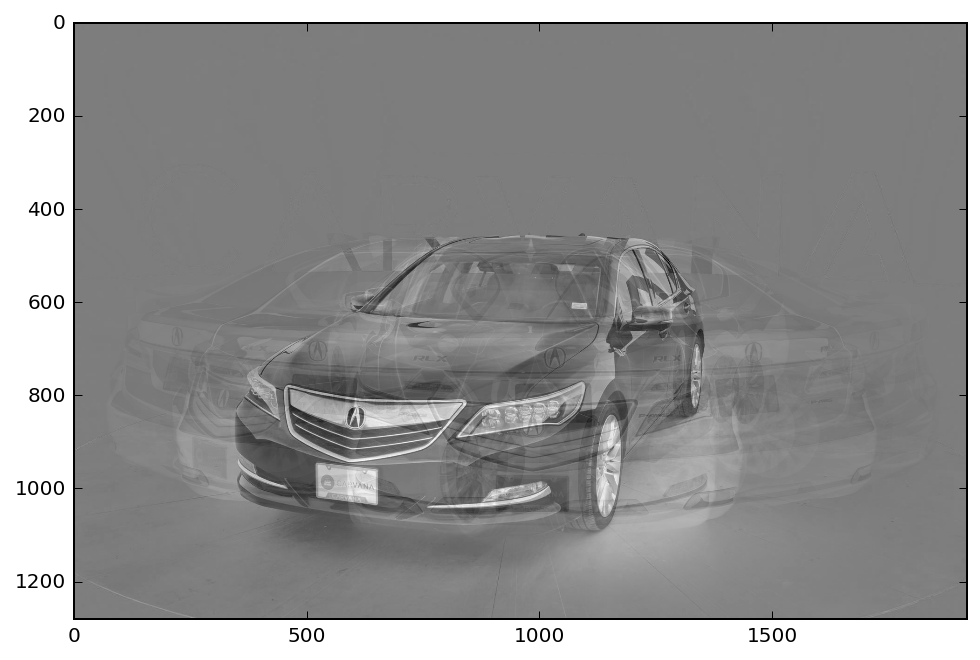

In [160]:
plt.imshow(toto.reshape(dims), cmap='gray');

In [ ]:
### systematic for the 16 x 6572

In [205]:
import concurrent.futures

In [27]:
import timeit

start_time = timeit.default_timer()



for uniq in uniq_img[:16]:
    reduced_pd = totalpd[totalpd.uniq_pictures==uniq]
    path_list = reduced_pd.path.tolist()
    img_list = reduced_pd.pictures.tolist()
    M = create_data_matrix_from_video(path_list, scale)
#     np.save('video_matrix', M)
#     M.shape, dims
#     print(len(reduced_pd.path.tolist()))
    U, s, Vh = decomposition.randomized_svd(M, 2)
#     print(U.shape, s.shape, Vh.shape)
#     np.savez('svd_components', U, s, Vh)
    low_rank_M = U.dot(np.diag(s).dot(Vh))
#     np.save('backgroundUSV/'+uniq, low_rank_M)
#     low_rank_M.shape
    people = M - low_rank_M

    for i in range(16):
        toto = (people[:,i]+255.)/2.
        cv2.imwrite('/opt/datasets/kaggle/Carvana/backgdusv2/'+img_list[i]+'.png',toto.reshape(dims))


print(timeit.default_timer() - start_time)

140.29856801


In [37]:
def produce_svd_img(uniq):

    reduced_pd = totalpd[totalpd.uniq_pictures==uniq]
    path_list = reduced_pd.path.tolist()
    img_list = reduced_pd.pictures.tolist()
    M = create_data_matrix_from_video(path_list, scale)
#     np.save('video_matrix', M)
#     M.shape, dims
#     print(len(reduced_pd.path.tolist()))
    U, s, Vh = decomposition.randomized_svd(M, 2)
#     print(U.shape, s.shape, Vh.shape)
#     np.savez('svd_components', U, s, Vh)
    low_rank_M = U.dot(np.diag(s).dot(Vh))
#     np.save('backgroundUSV/'+uniq, low_rank_M)
#     low_rank_M.shape
    people = M - low_rank_M

    for i in range(16):
        toto = (people[:,i]+255.)/2.
        cv2.imwrite('/opt/datasets/kaggle/Carvana/backgdusv2/'+img_list[i]+'.png',toto.reshape(dims))

In [ ]:

import timeit

start_time = timeit.default_timer()
print start_time

from multiprocessing.dummy import Pool as ThreadPool 


# make the Pool of workers
pool = ThreadPool(25) 

# open the urls in their own threads
# and return the results
results = pool.map(produce_svd_img, uniq_img)

# close the pool and wait for the work to finish 
pool.close() 
pool.join()

print(timeit.default_timer() - start_time)

1504736626.03


In [41]:
6512/40.*124/3600.

5.6076

In [ ]:
people = M - low_rank_M
plt.imshow(people[:,15].reshape(dims));

In [74]:
people.shape

(2455040, 16)

In [80]:
10*6500/3600

18

In [161]:
#### PCA FACEBOOK

In [162]:
from scipy import sparse
from sklearn.utils.extmath import randomized_svd
import fbpca

In [199]:
#     M = create_data_matrix_from_video(path_list, scale)
#     np.save('video_matrix', M)
#     M.shape, dims
#     print(len(reduced_pd.path.tolist()))
U, s, Vh = fbpca.pca(M, 9)
#     print(U.shape, s.shape, Vh.shape)
#     np.savez('svd_components', U, s, Vh)
low_rank_Mpca = U.dot(np.diag(s).dot(Vh))
#     np.save('backgroundUSV/'+uniq, low_rank_M)
#     low_rank_M.shape
people = M - low_rank_Mpca

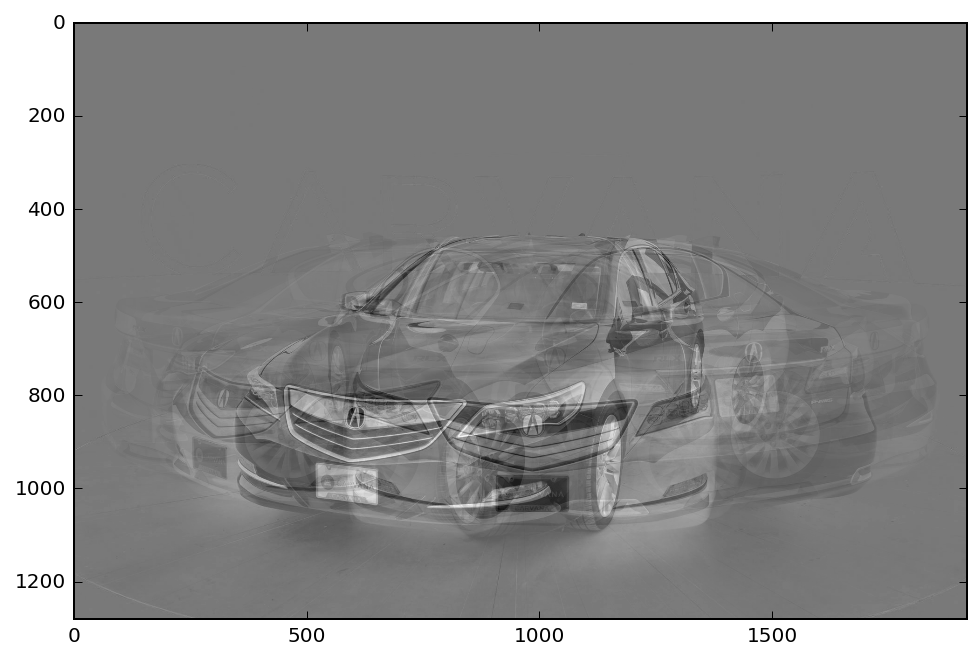

In [204]:
people = M - low_rank_Mpca
plt.imshow(people[:,1].reshape(dims), cmap='gray');

In [90]:
TOL=1e-9
MAX_ITERS=3

In [91]:
def converged(Z, d_norm):
    err = np.linalg.norm(Z, 'fro') / d_norm
    print('error: ', err)
    return err < TOL

In [92]:
def shrink(M, tau):
    S = np.abs(M) - tau
    return np.sign(M) * np.where(S>0, S, 0)

In [93]:
def _svd(M, rank): 
    return fbpca.pca(M, k=min(rank, np.min(M.shape)), raw=True)

In [94]:
def norm_op(M): return _svd(M, 1)[1][0]

In [95]:
def svd_reconstruct(M, rank, min_sv):
    u, s, v = _svd(M, rank)
    s -= min_sv
    nnz = (s > 0).sum()
    return u[:,:nnz].dot(np.diag(s[:nnz])).dot(v[:nnz]), nnz #U.dot(np.diag(s).dot(Vh))

In [128]:
def pcp(X, maxiter=10, k=10): # refactored
    m, n = X.shape
    trans = m<n
    if trans: X = X.T; m, n = X.shape
        
    lamda = 1/np.sqrt(m)
    op_norm = norm_op(X)
    Y = np.copy(X) / max(op_norm, np.linalg.norm( X, np.inf) / lamda)
    mu = k*1.25/op_norm; mu_bar = mu * 1e7; rho = k * 1.5
    
    d_norm = np.linalg.norm(X, 'fro')
    L = np.zeros_like(X); sv = 1
    
    examples = []
    
    for i in range(maxiter):
        print("rank sv:", sv)
        X2 = X + Y/mu
        
        # update estimate of Sparse Matrix by "shrinking/truncating": original - low-rank
        S = shrink(X2 - L, lamda/mu)
        
        # update estimate of Low-rank Matrix by doing truncated SVD of rank sv & reconstructing.
        # count of singular values > 1/mu is returned as svp
        L, svp = svd_reconstruct(X2 - S, sv, 1/mu)
        
        # If svp < sv, you are already calculating enough singular values.
        # If not, add 20% (in this case 240) to sv
        sv = svp + (1 if svp < sv else round(0.05*n))
        sv = int(sv)
        # residual
        Z = X - L - S
        Y += mu*Z; mu *= rho
        
        examples.extend([S[140,:], L[140,:]])
        
        if m > mu_bar: m = mu_bar
        if converged(Z, d_norm): break
    
    if trans: L=L.T; S=S.T
    return L, S, examples

In [129]:
m, n = M.shape
m,n

(2455040, 16)

In [130]:
L, S, examples =  pcp(M, maxiter=10, k=10)

('rank sv:', 1)
('error: ', 0.073053405132494281)
('rank sv:', 2)
('error: ', 0.0050423431481006146)
('rank sv:', 2)
('error: ', 0.00012548826324427462)
('rank sv:', 2)
('error: ', 2.2213849272929206e-06)
('rank sv:', 2)
('error: ', 4.0429770493433595e-08)
('rank sv:', 2)
('error: ', 9.0304919569564838e-10)


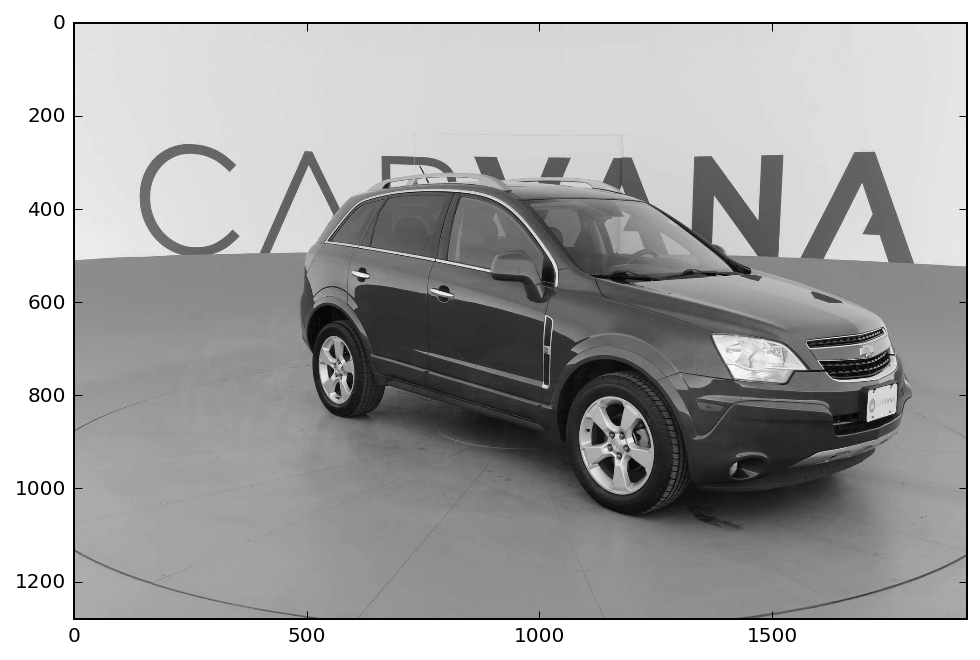

In [127]:
plt.imshow(np.reshape(S[:,14], dims), cmap='gray')

In [15]:
import glob
import cv2

In [16]:
carvana_path = '/opt/datasets/kaggle/Carvana/'
testmasks_fld =  sorted(glob.glob(carvana_path + 'test_masks/*'))
len(testmasks_fld)

100064

In [17]:
carvana_path = '/opt/datasets/kaggle/Carvana/'
test_fld =  sorted(glob.glob(carvana_path + 'test_masks_prob/*'))
len(test_fld)

100064

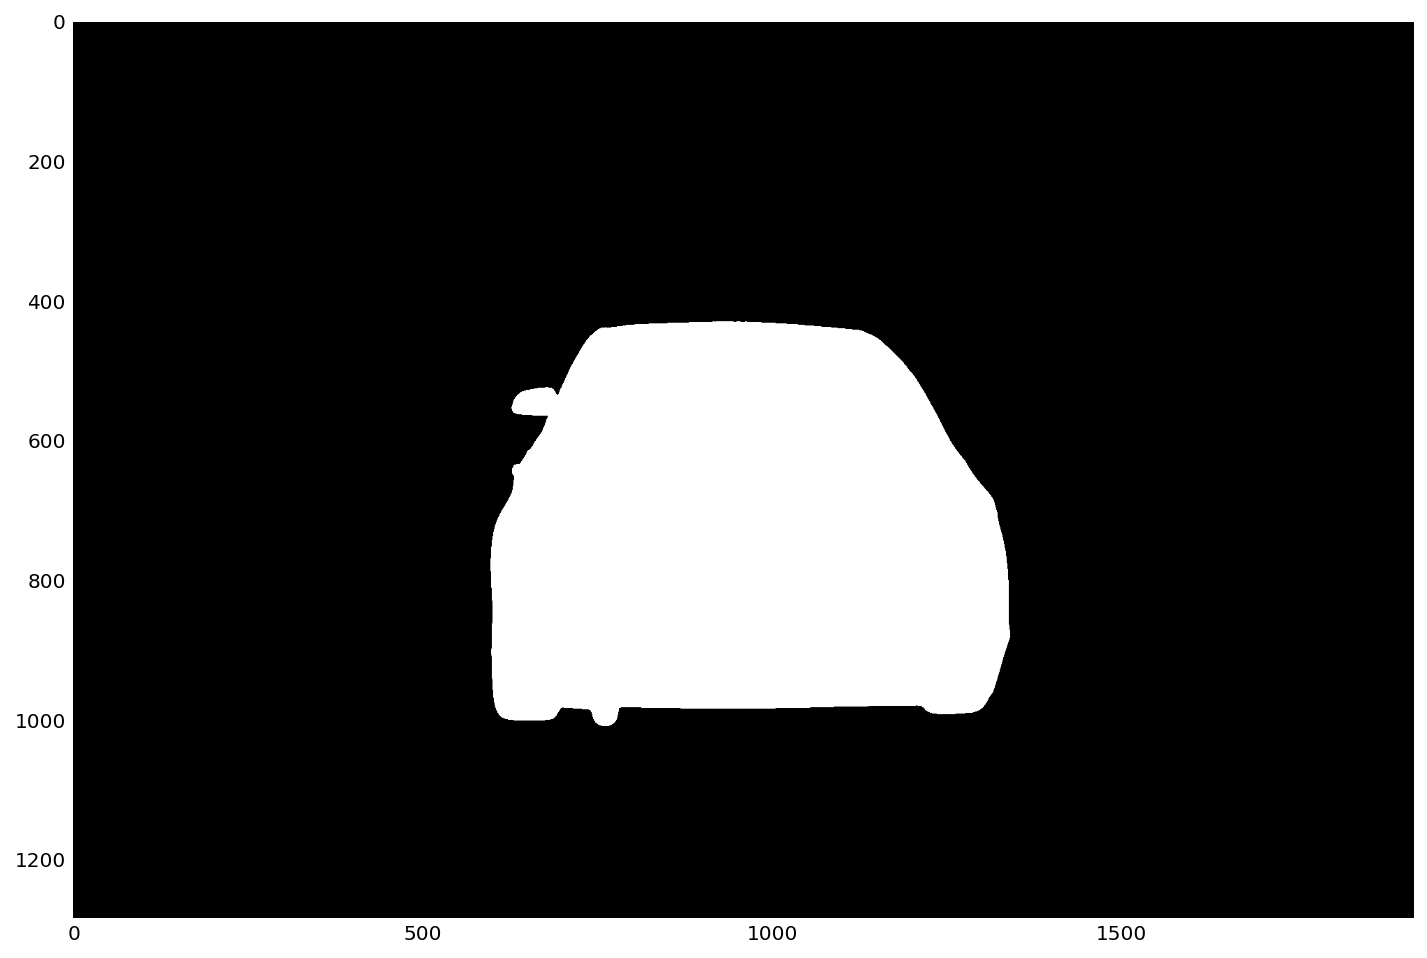

In [18]:
toto = cv2.imread(test_fld[8+16*4])

plt.figure(figsize=(12,12))
plt.imshow(toto)

In [19]:
np.histogram(toto)

(array([6285225,      48,      54,      48,      30,      36,      30,      60,      87, 1079502]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,  204. ,  229.5,  255. ]))

In [20]:
path_mask = '/opt/datasets/kaggle/Carvana/test_masks/011330127438_12.jpg.png'

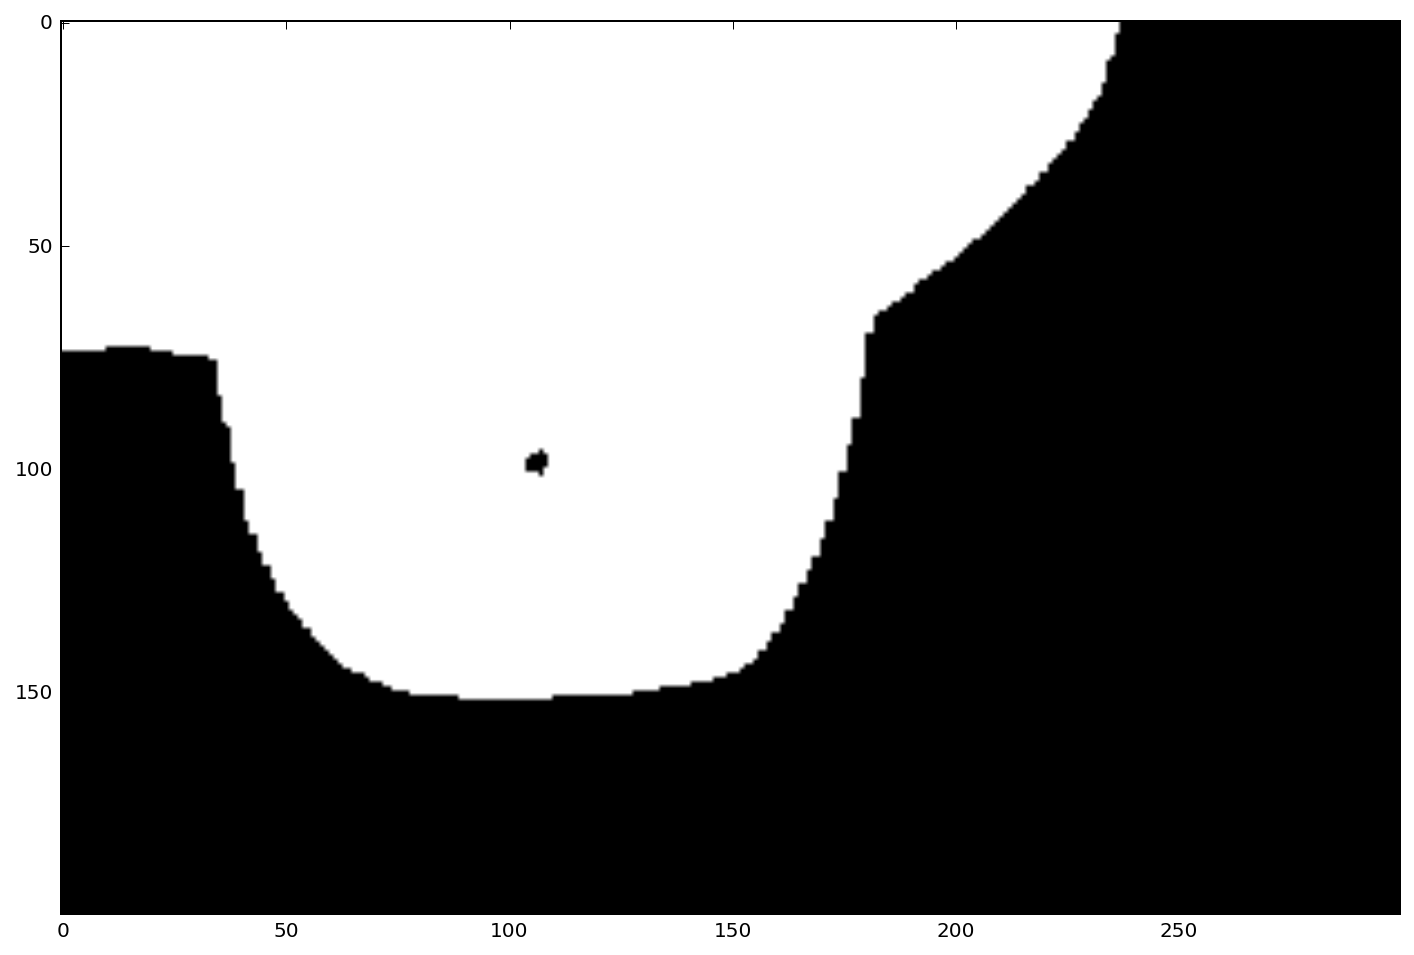

In [21]:
toto = cv2.imread(testmasks_fld[8+16*5689])


plt.figure(figsize=(12,12))
plt.imshow(toto[800:1000,1200:1500,:]*255)

In [22]:
np.histogram(totototo)

NameError: name 'totototo' is not defined

In [23]:
from skimage import morphology, measure

In [24]:
tata = toto*255
tata.mean()

58.5691

In [25]:
img = morphology.remove_small_objects(tata, min_size=10000, connectivity=2, in_place=False)
img2 = np.invert(img)
img3 = morphology.remove_small_objects(img2, min_size=10000, connectivity=2, in_place=False)
img4 = np.invert(img3)

58.5690660845


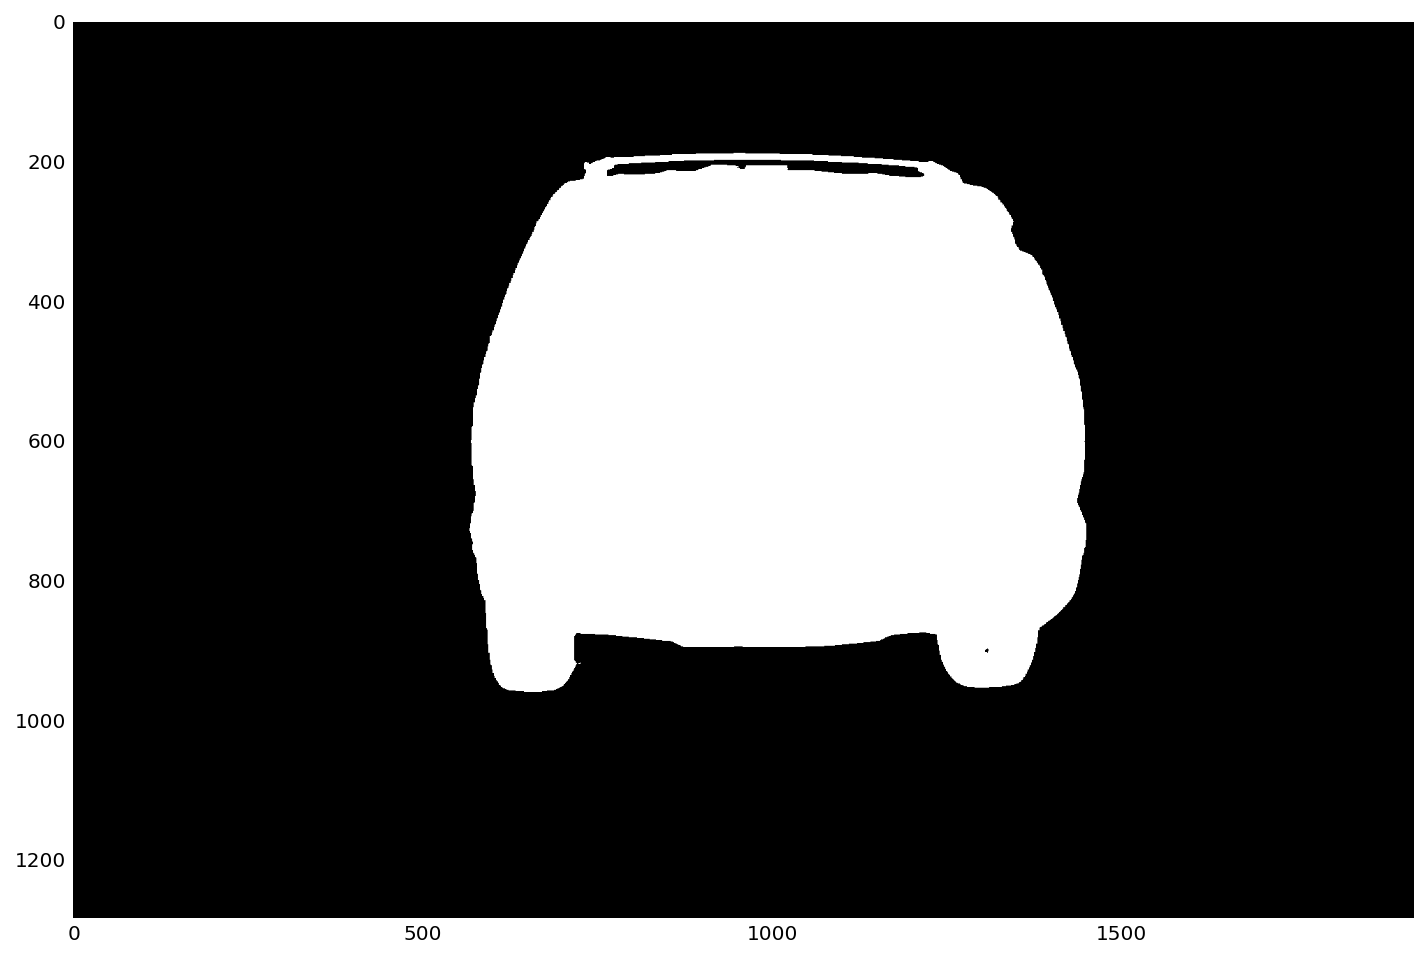

In [26]:
print img4.mean()
plt.figure(figsize=(12,12))
plt.imshow(img4)

In [265]:
tata = toto*255
tata.mean()

58.5691

In [254]:
img_img = tata.copy()
limg = measure.label(img_img)
props = measure.regionprops(limg)
props = sorted(props, key=lambda p: -p.area)
# Erase all except the biggest blob
L = [r.area for r in props]
print len(L)
index_L = next(x[0] for x in enumerate(L) if x[1] <100)
# if index_L != 0:
#     for popoo in range(index_L):
#         img_img = img_img & (limg == props[popoo].label)

# img_img = np.invert(img_img)

2


(1280, 1918, 3) 0.229684241397


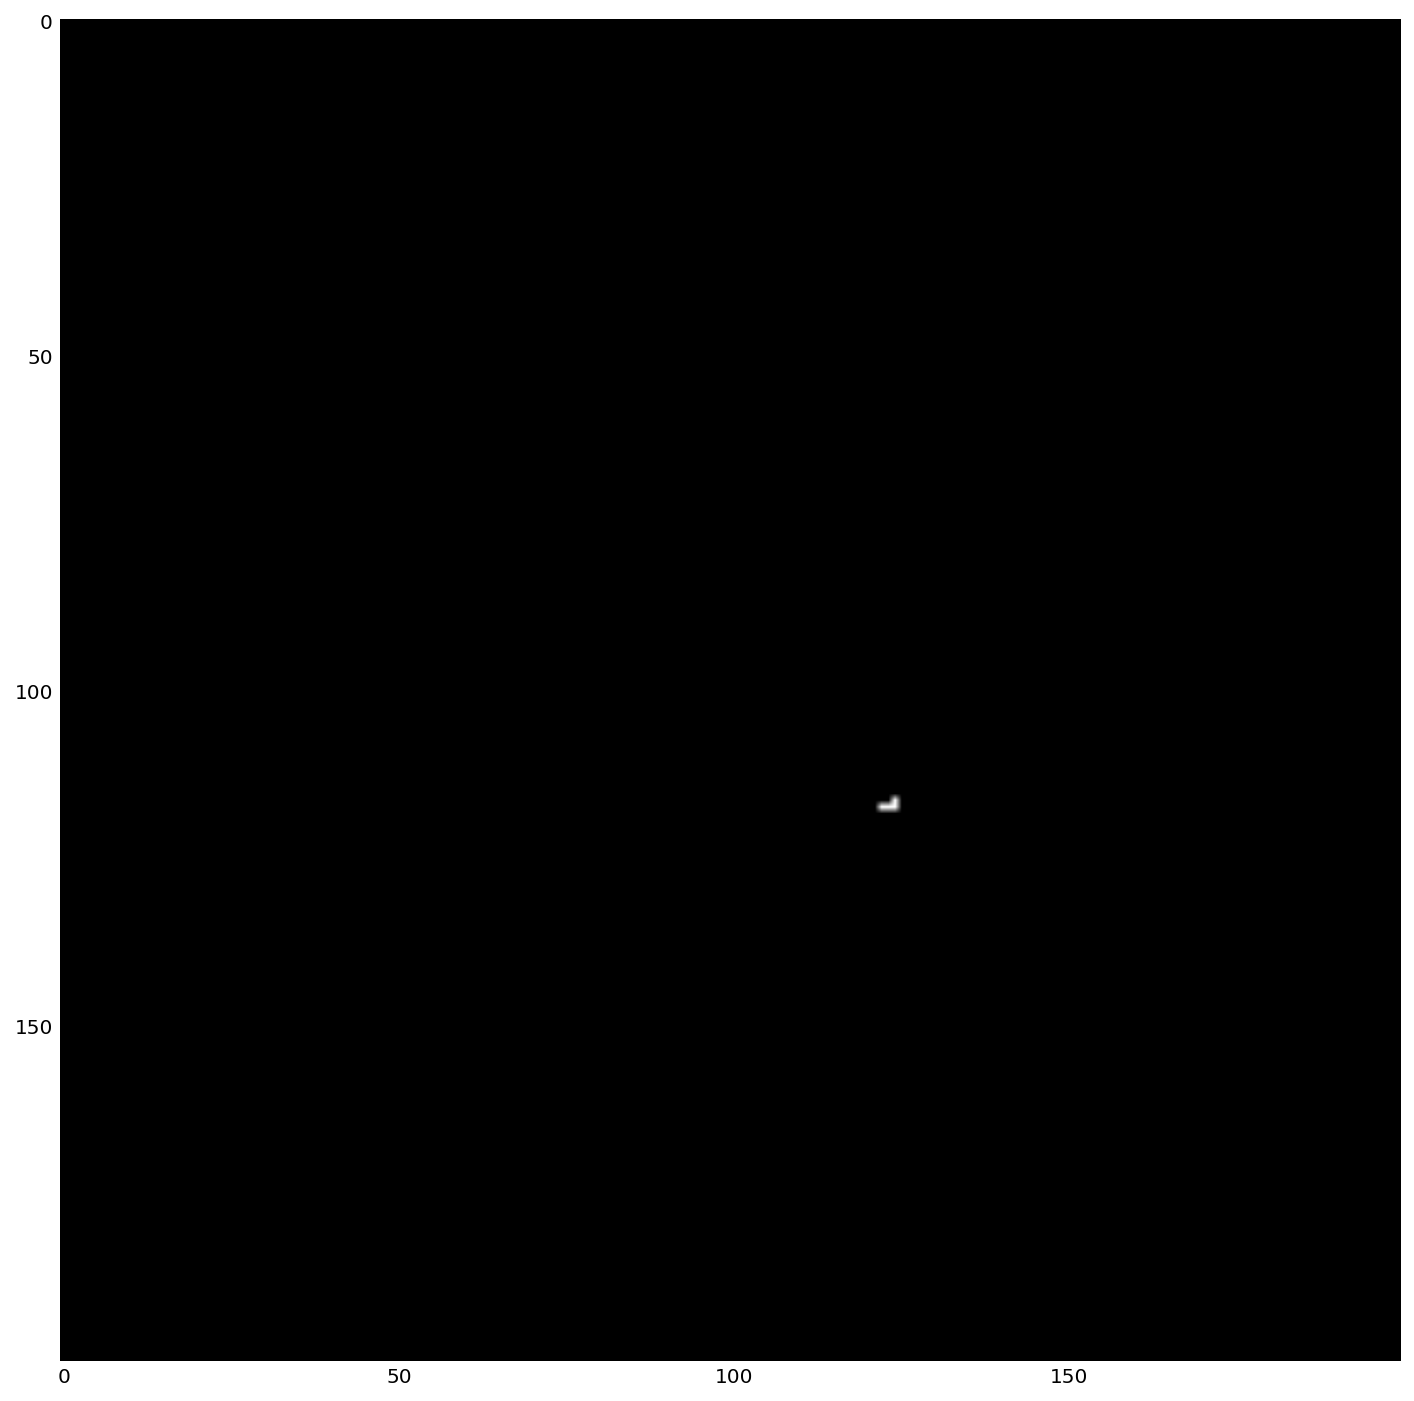

In [260]:
plt.figure(figsize=(12,12))
plt.imshow((limg == props[1].label)[800:1000,600:800])
print limg.shape, limg[:,:,0].mean()

In [262]:
prop0 = np.invert(np.array((limg[:,:,0] == props[0].label), dtype=np.uint8))
prop0b = np.array((limg[:,:,0] == props[0].label), dtype=np.uint8)

In [263]:
prop1 = np.invert(np.array((limg[:,:,0] == props[1].label), dtype=np.uint8))
prop1b = np.array((limg[:,:,0] == props[1].label), dtype=np.uint8)

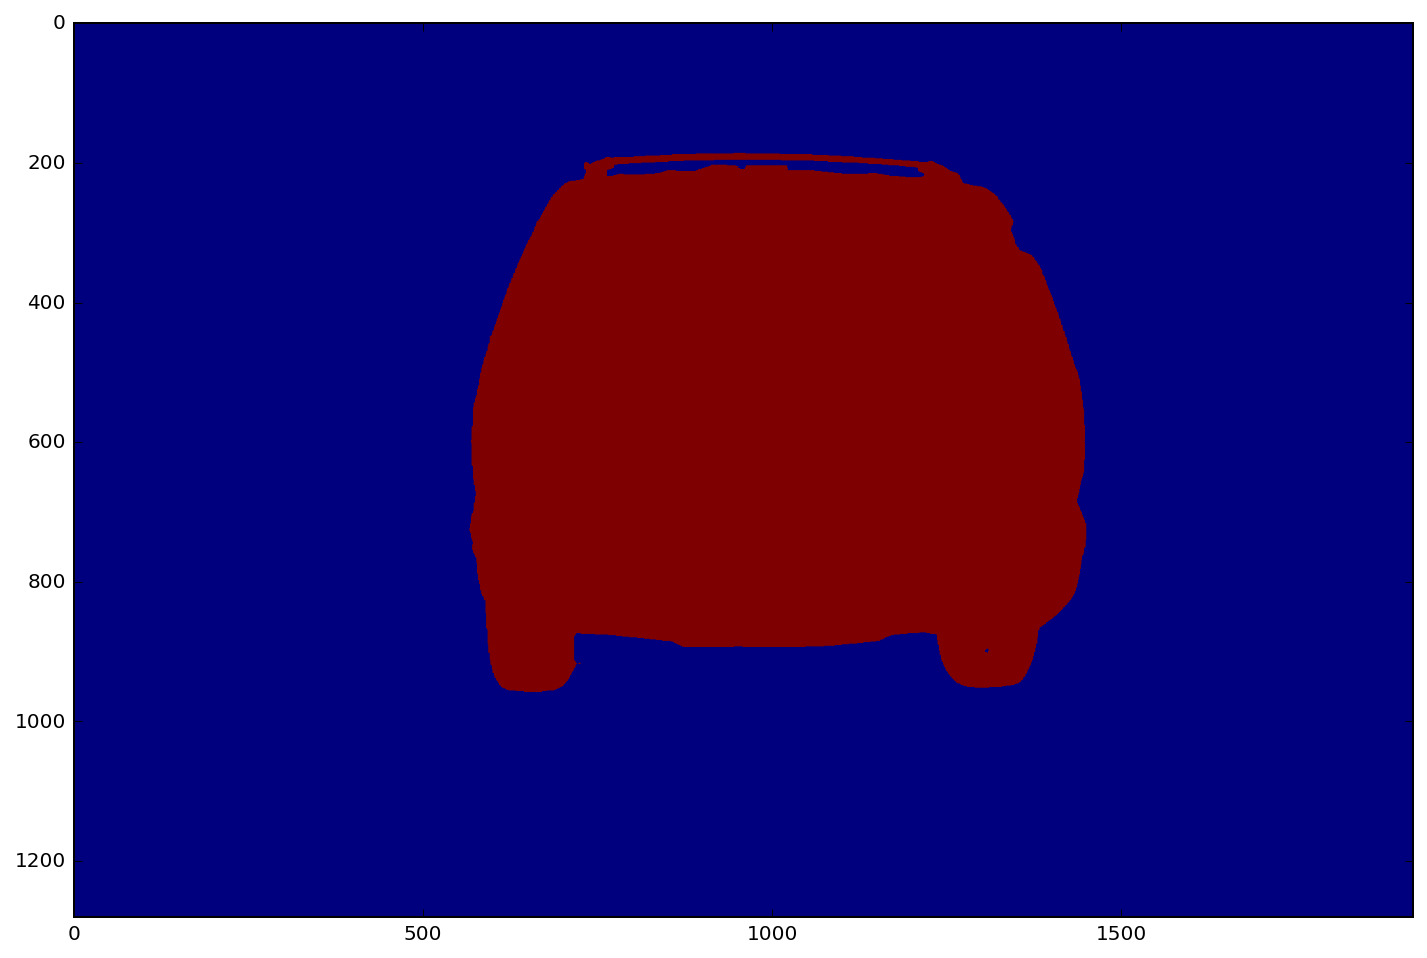

In [264]:
img_img2 = cv2.bitwise_xor(prop0b,prop1b)
plt.figure(figsize=(12,12))
plt.imshow(img_img2)

In [321]:
tata.shape

(1280, 1918, 3)

In [330]:
tata = toto[:,:,0]*255
tata.mean()

58.5691

In [331]:
img_inv = np.invert(tata.copy())
limg_inv = measure.label(img_inv)
propsinvert = measure.regionprops(limg_inv)
propsinvert = sorted(propsinvert, key=lambda p: -p.area)

# Erase all except the biggest blob
L = [r.area for r in propsinvert]
print len(L), L

index_L = next(x[0] for x in enumerate(L) if x[1] <100)
# img_inv_prep = np.array((limg == propsinvert[0].label), dtype=np.uint8)
# if index_L >0:
#     for index in range(1,index_L):
#         img_imgprep = cv2.bitwise_xor(img_imgprep,np.array((limg == props[index].label), dtype=np.uint8))

        
img_img = np.invert(img_imgprep.copy())
limg = measure.label(img_img)
props = measure.regionprops(limg)
props = sorted(props, key=lambda p: -p.area)

# Erase all except the biggest blob
L = [r.area for r in props]
print len(L), L

index_L = next(x[0] for x in enumerate(L) if x[1] <100)
img_imgprep2 = np.invert(np.array((limg == props[0].label), dtype=np.uint8))
# if index_L >0:
#     for index in range(1,index_L):
#         img_imgprep2 = cv2.bitwise_xor(img_imgprep2,np.array((limg == props[index].label), dtype=np.uint8))
    
       
    

3 [1885378, 5762, 20]
4 [5656134, 1691688, 17286, 12]


In [332]:
(limg_inv == propsinvert[2].label).shape

(1280, 1918)

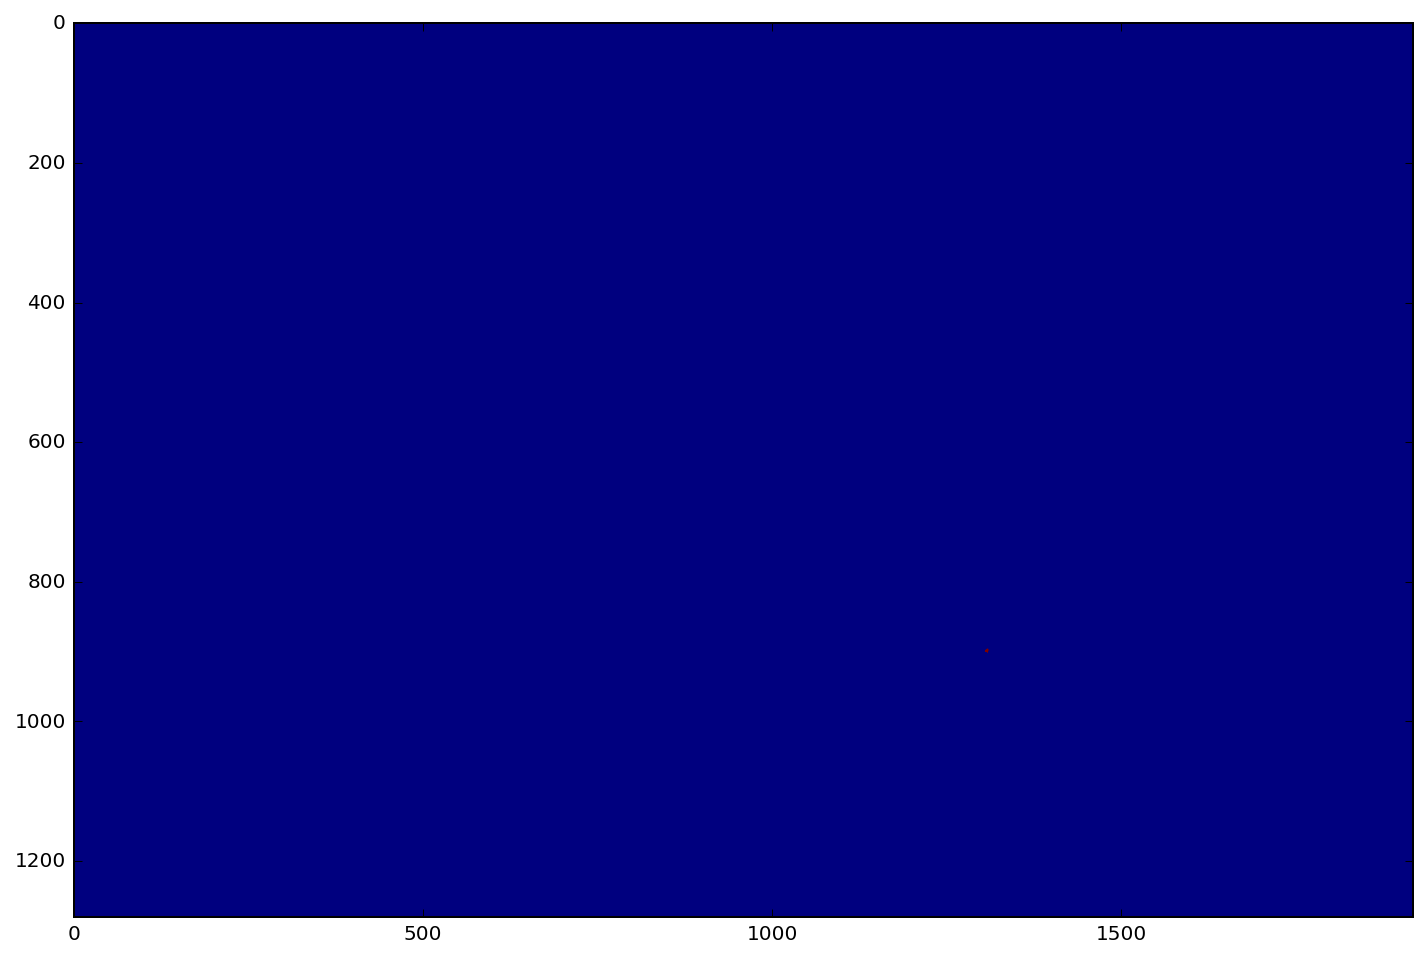

In [333]:

plt.figure(figsize=(12,12))
plt.imshow((limg_inv == propsinvert[2].label))

In [334]:
img_inv_temp = tata - (limg_inv == propsinvert[2].label)

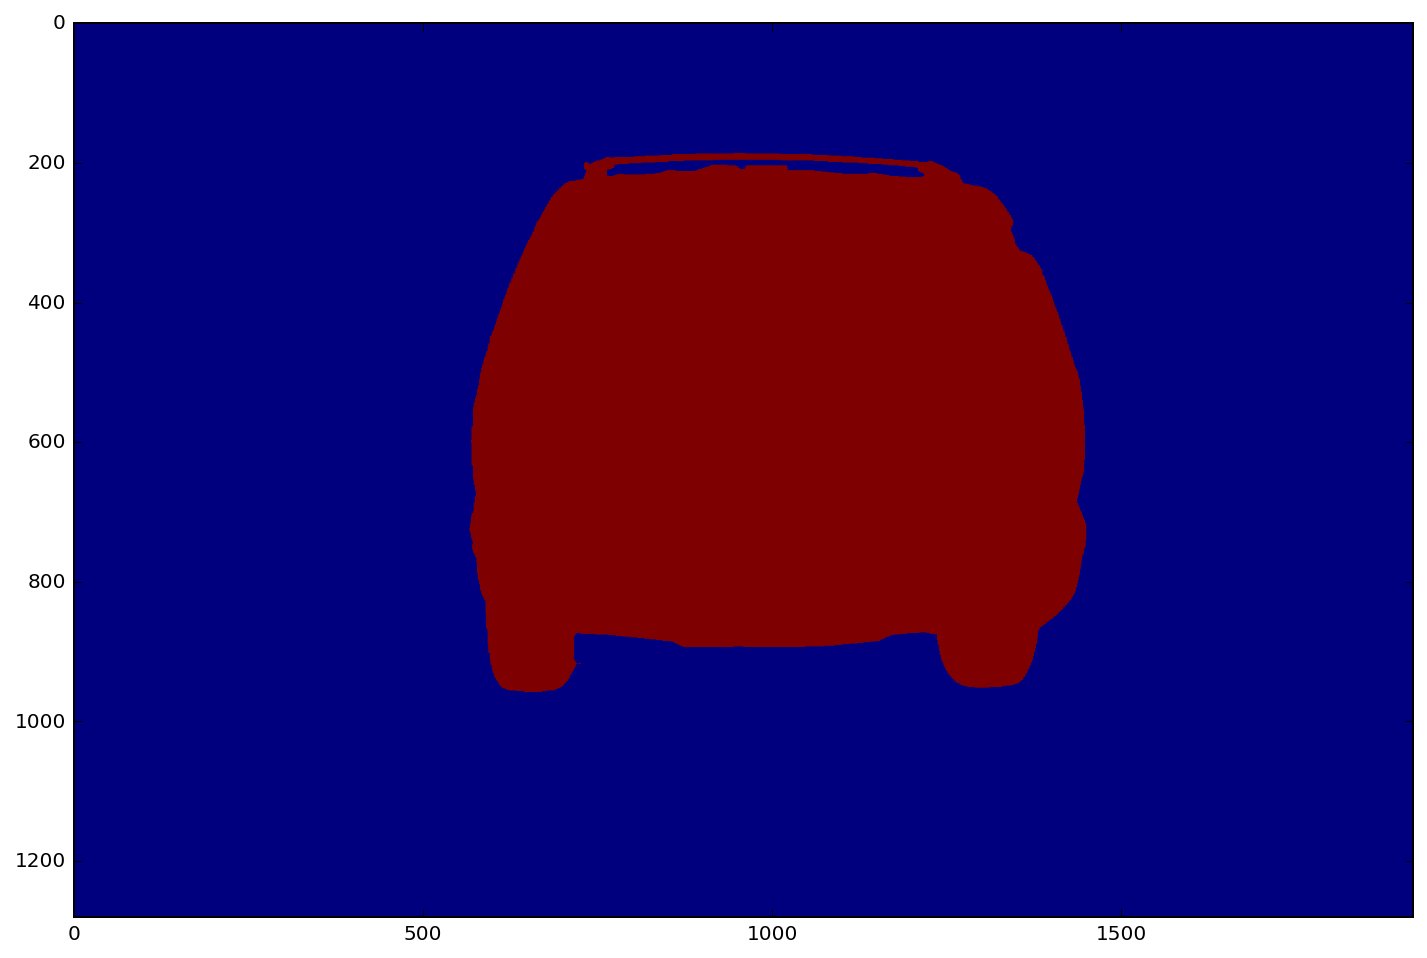

In [335]:
plt.figure(figsize=(12,12))
plt.imshow(img_inv_temp)

In [ ]:
# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector()
 
# Detect blobs.
keypoints = detector.detect(im)
 
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

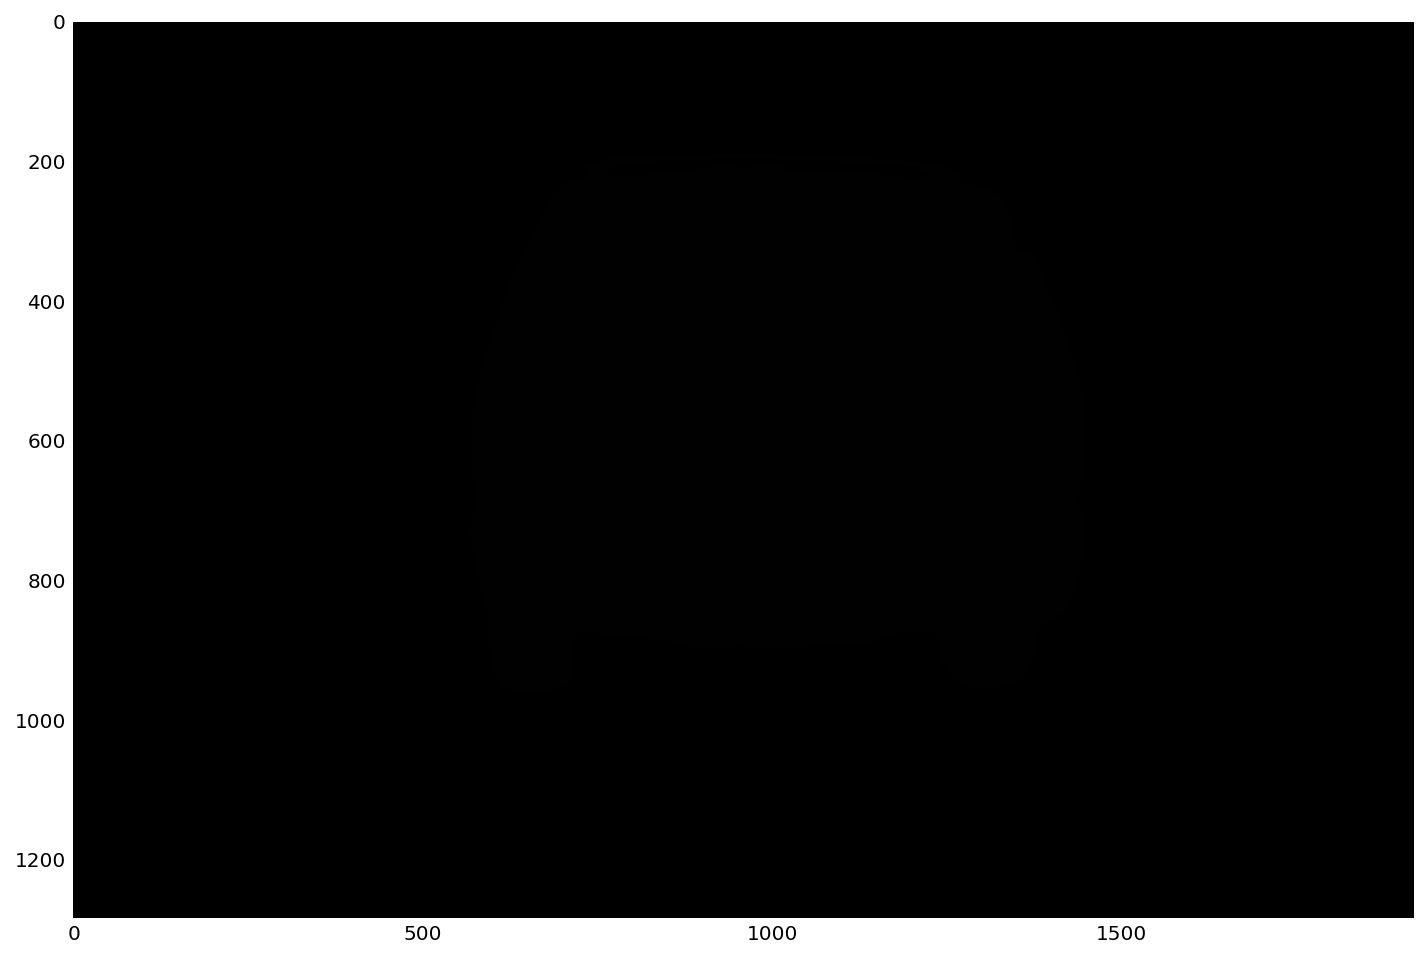

In [200]:
plt.figure(figsize=(12,12))
plt.imshow(img_img*255)

In [121]:
props[2]

In [117]:
# import numpy as np
# import cv2

def hitmiss(src, kernel):
    im = src /255
    k1 = (kernel == 1).astype('uint8')
    k2 = (kernel == -1).astype('uint8')
    e1 = cv2.erode(im, k1, borderType=cv2.BORDER_CONSTANT)
    e2 = cv2.erode(1-im, k2, borderType=cv2.BORDER_CONSTANT)
    return e1 & e2


#     im = cv2.imread('blobs.png', cv2.CV_LOAD_IMAGE_GRAYSCALE)
#     _, im_binary = cv2.threshold(im, 50, 255, cv2.THRESH_BINARY)

im_binary = tata.copy()
kernel = np.array([[-1,-1, 1], 
                   [-1, 1, 1], 
                   [-1,-1, 1]])

im_mask = np.zeros(im_binary.shape, np.uint8)

im_mask |= hitmiss(im_binary, kernel)
im_mask |= hitmiss(im_binary, np.fliplr(kernel))
im_mask |= hitmiss(im_binary, kernel.T)
im_mask |= hitmiss(im_binary, np.flipud(kernel.T))

im_dst = im_binary & ((1 - im_mask) * 255)
# cv2.imwrite('dst.png', im_dst)

In [118]:
im_dst.mean()

58.5687

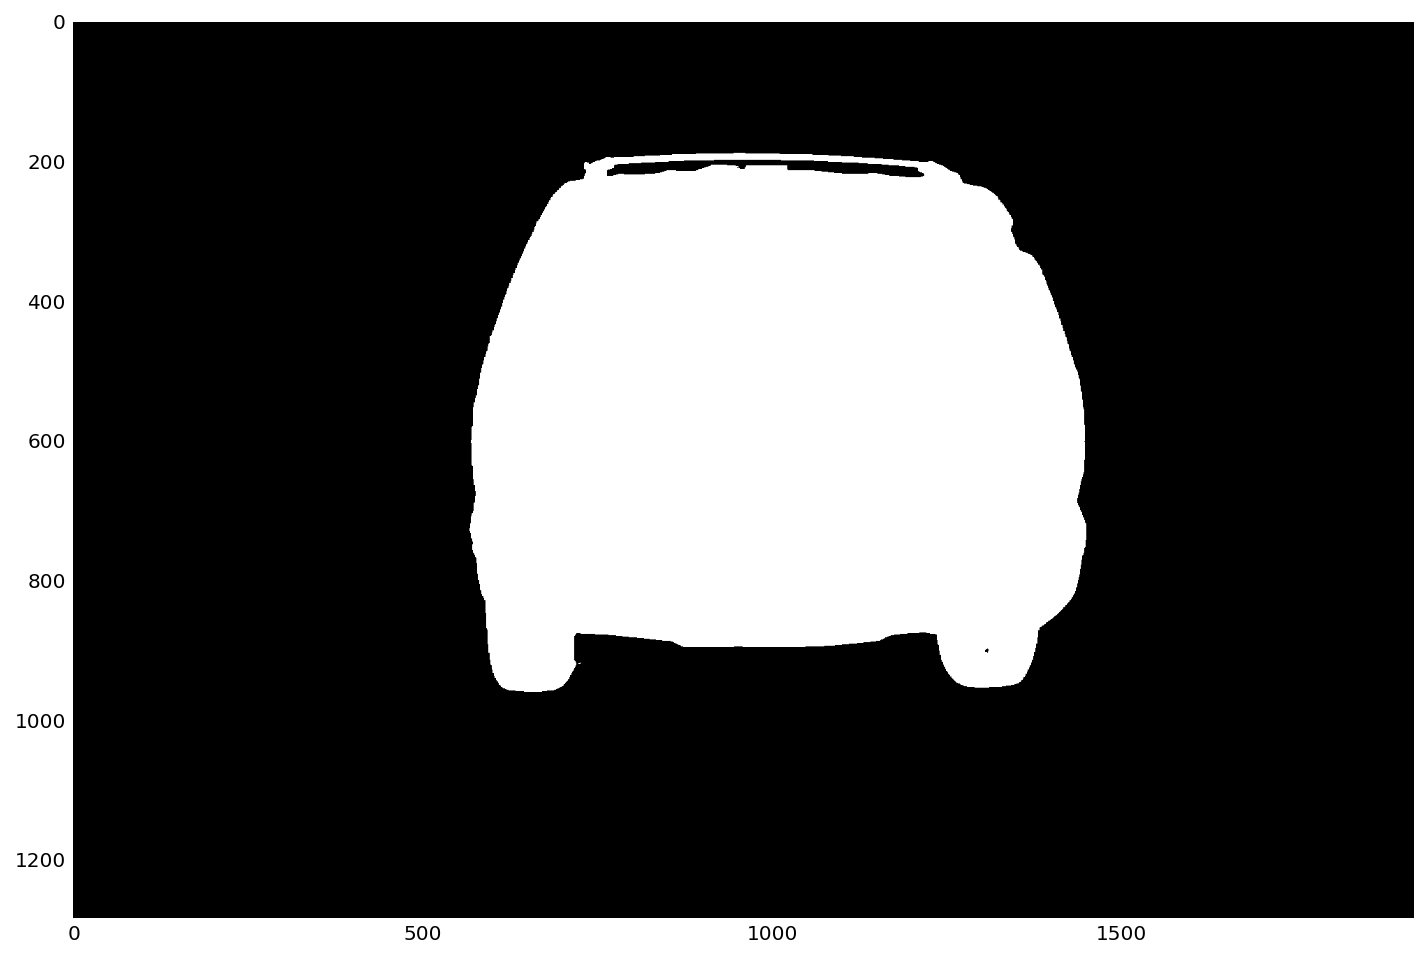

In [120]:
plt.figure(figsize=(12,12))
plt.imshow(im_dst)

In [107]:
# L = [r.area for r in props]
# next(x[0] for x in enumerate(L) if x[1] <100)

196.430933916 255


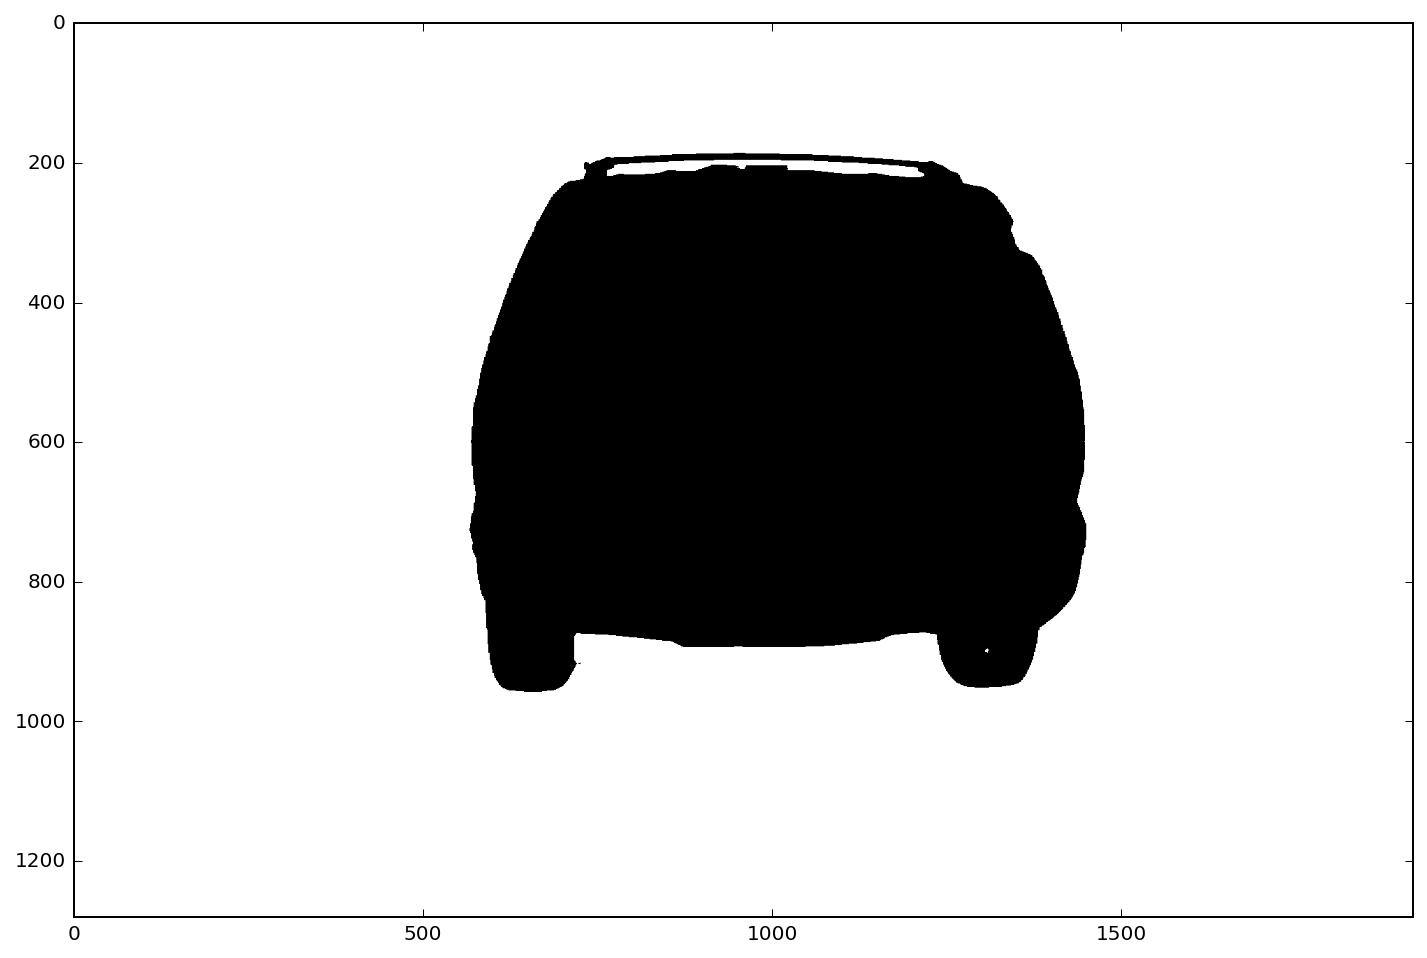

In [108]:
print img_img.mean(), img_img.max()
plt.figure(figsize=(12,12))
plt.imshow(img_img)

In [10]:
from scipy import ndimage

In [11]:
ttaa =toto[800:1000,1200:1500,:]*255
opening = ndimage.binary_opening(ttaa, structure=np.ones((15,15))).astype(np.uint8)

plt.figure(figsize=(12,12))
plt.imshow(opening)

RuntimeError: structure and input must have same dimensionality

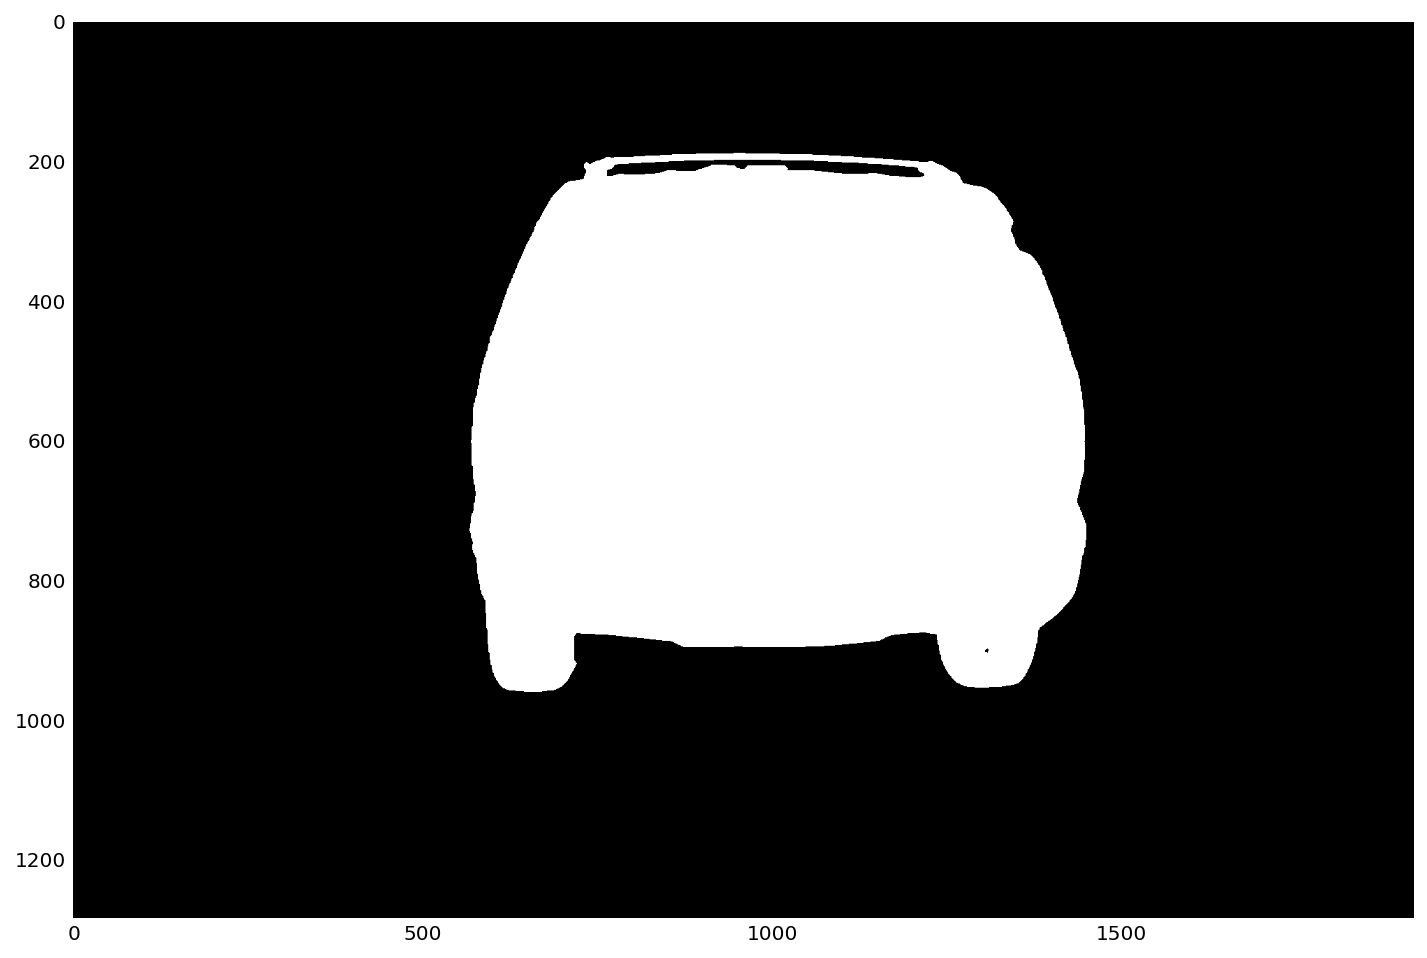

In [17]:

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
(thresh, binRed) = cv2.threshold(toto*255, 0, 255, cv2.THRESH_BINARY)
opening = cv2.morphologyEx(toto*255, cv2.MORPH_OPEN, kernel, iterations=3)

plt.figure(figsize=(12,12))
plt.imshow(opening)

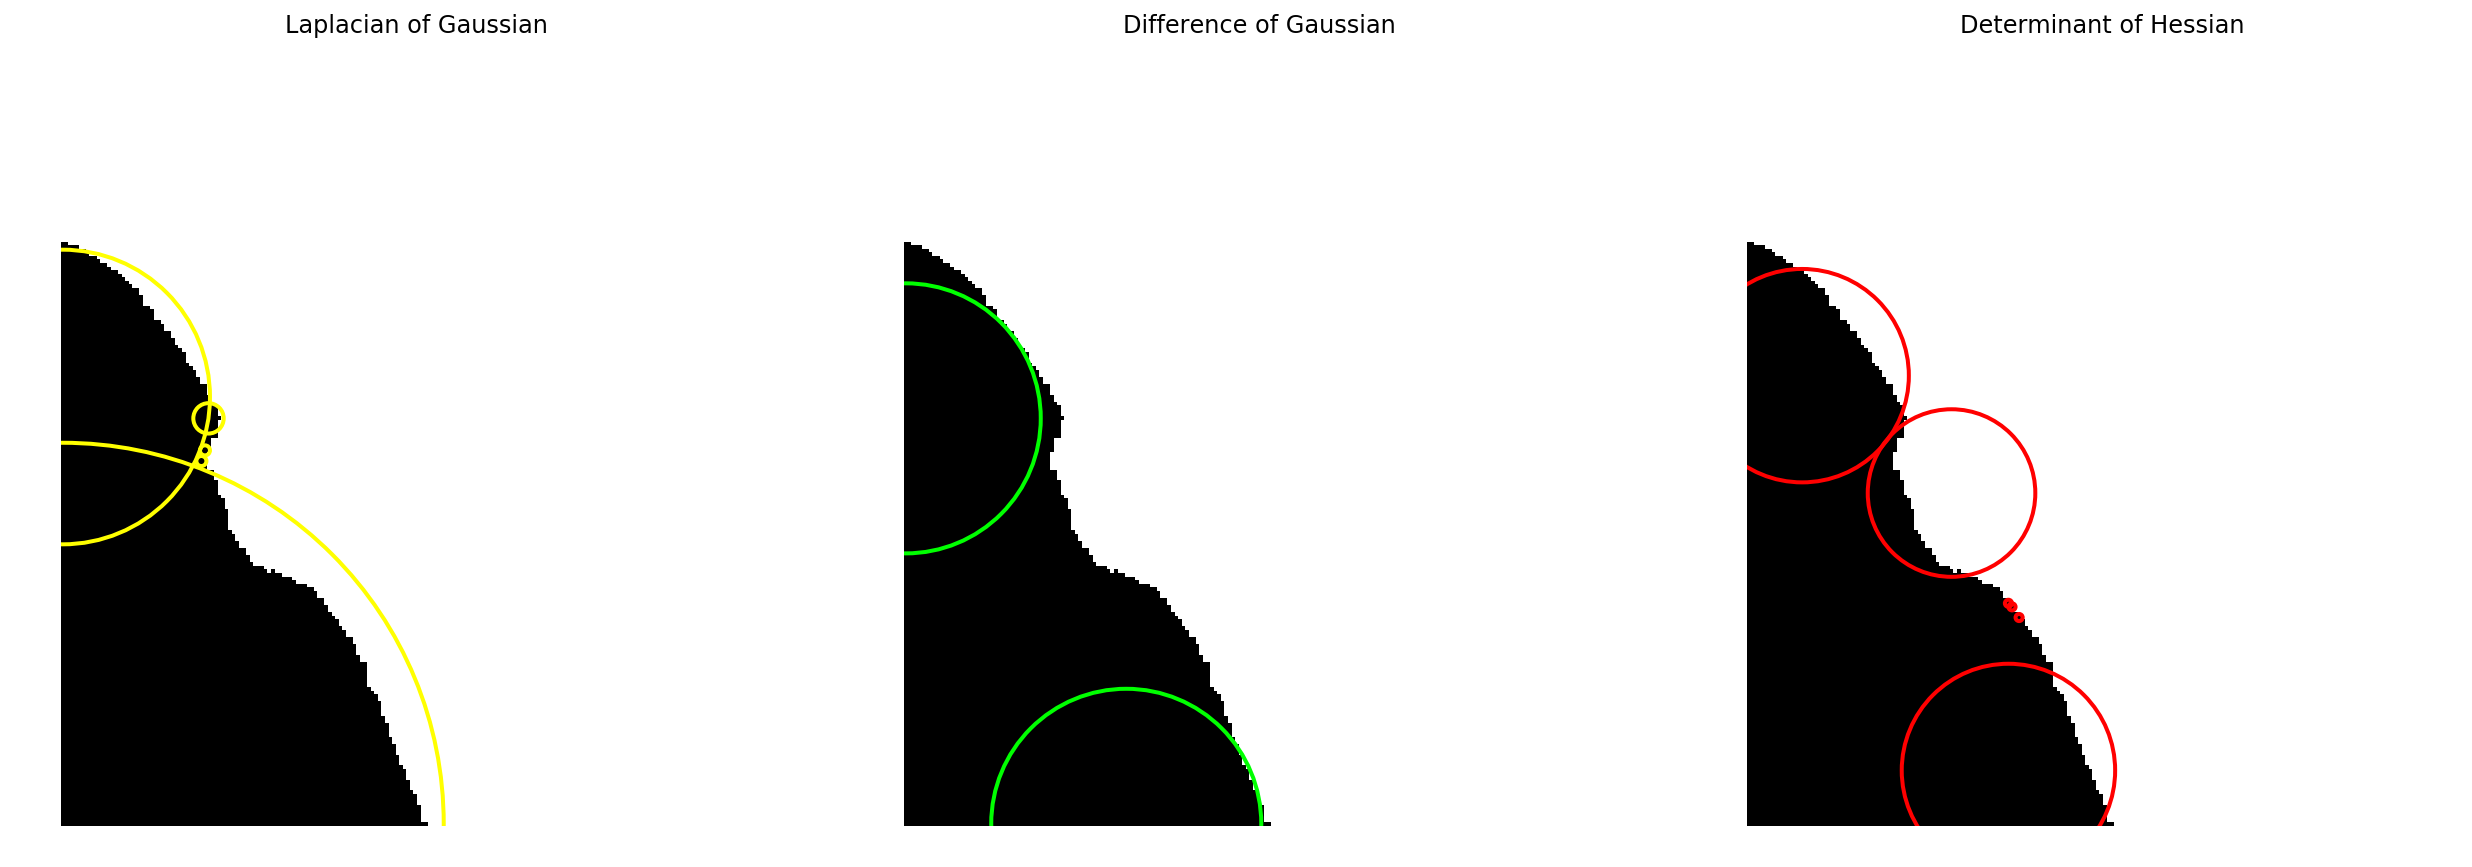

In [11]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh

image = cv2.bitwise_not(tata)
image_gray = tata[:,:,0]


blobs_log = blob_log(image_gray, max_sigma=100, num_sigma=50, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image, interpolation='nearest')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()


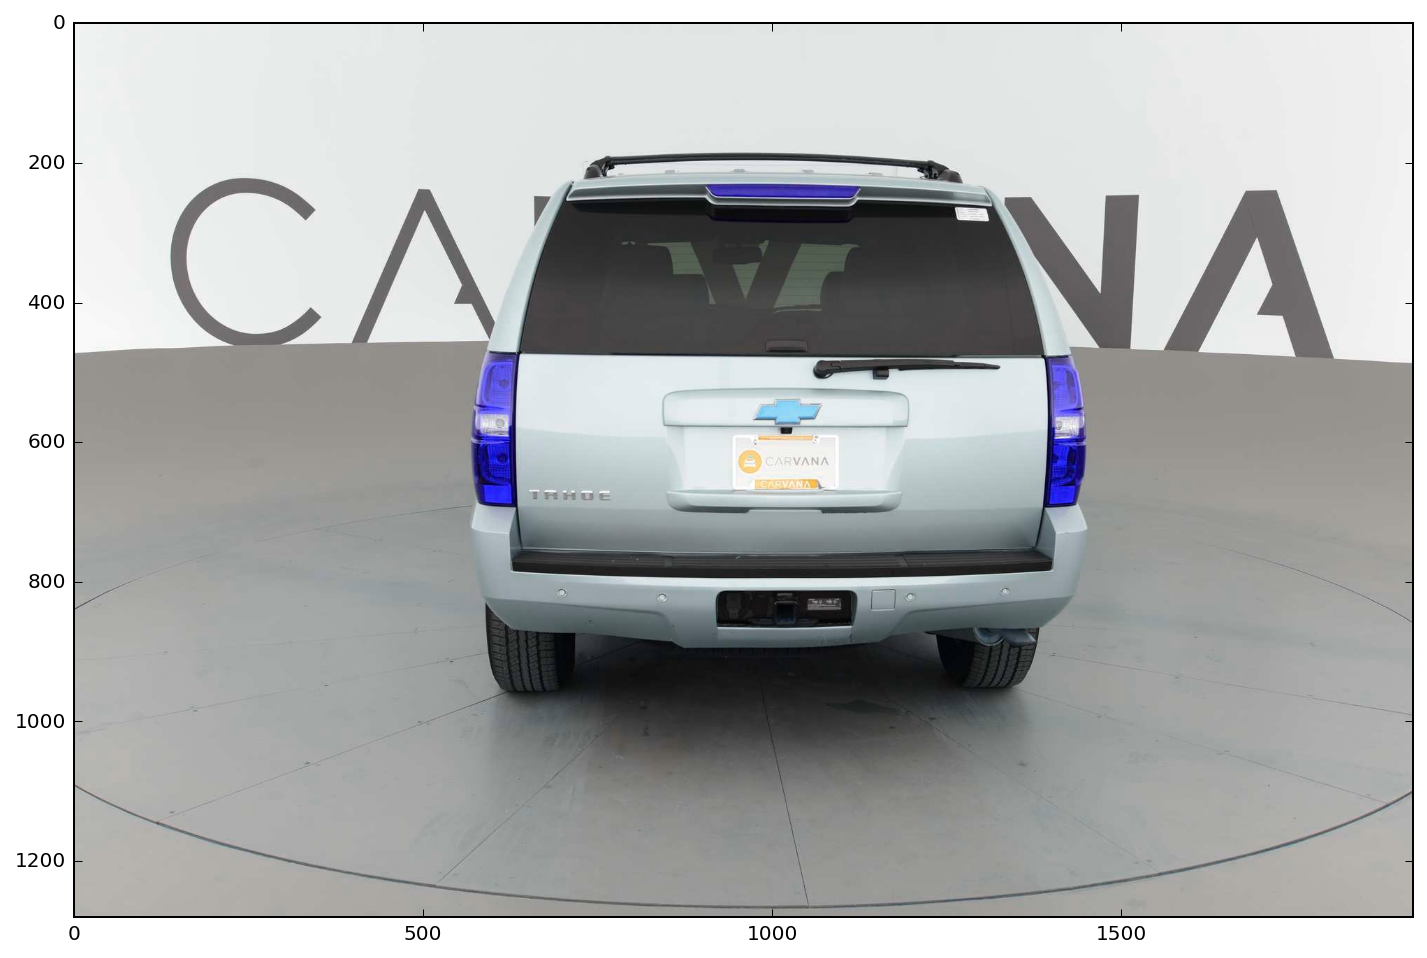

In [33]:
path_mask_test = '/opt/datasets/kaggle/Carvana/test/011330127438_12.jpg'
toto = cv2.imread(test_fld[8+16*5689])
toto.shape

plt.figure(figsize=(12,12))
plt.imshow(toto)